# **Dataset Bike Sharing**

# Konteks
Sistem Bike-sharing  adalah generasi baru dari penyewaan sepeda tradisional di mana seluruh proses, mulai dari keanggotaan, penyewaan, dan pengembalian sepeda, menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan mengembalikannya di posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan dan kesehatan.
Terlepas dari aplikasi dunia nyata yang menarik dari sistem berbagi sepeda, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk diteliti. Tidak seperti layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, keberangkatan, dan posisi kedatangan secara eksplisit dicatat dalam sistem ini. Fitur ini mengubah sistem bike-sharing menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di dalam kota. Oleh karena itu, diharapkan kejadian-kejadian penting di kota dapat dideteksi dengan memantau data-data ini.


# Features

- dteday: date

- season: season (1: winter, 2: spring, 3: summer, 4: fall)

- hr: hour (0 to 23)

- holiday: holiday or not

- temp: normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)

- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)

- hum: normalized humidity. The values are divided into 100 (max)

- casual: count of casual users

- registered: count of registered users

- cnt: count of total rental bikes including both casual and registered

- weathersit:
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


# **Kasus Bisnis: Optimalisasi Pengelolaan Sistem Bike Sharing**

# Latar Belakang:
Sistem bike sharing merupakan layanan penyewaan sepeda di mana pengguna dapat menyewa sepeda dari satu lokasi dan mengembalikannya di lokasi lain. Dengan meningkatnya minat masyarakat terhadap transportasi ramah lingkungan dan kebutuhan akan mobilitas yang cepat di perkotaan, perusahaan bike sharing menghadapi tantangan dalam mengelola ketersediaan sepeda di berbagai stasiun penyewaan. Ketidakmampuan untuk memprediksi permintaan sepeda pada waktu tertentu dapat mengakibatkan kekurangan atau kelebihan sepeda di stasiun tertentu, yang pada akhirnya menurunkan kepuasan pengguna.

# Tujuan:
Membangun model prediksi permintaan sepeda yang dapat membantu perusahaan bike sharing dalam mengoptimalkan distribusi sepeda di berbagai stasiun, sehingga ketersediaan sepeda dan slot pengembalian dapat terpenuhi dengan baik.

# Masalah yang Dihadapi:
- Ketidakmampuan untuk Memperkirakan Permintaan Sepeda:
    Kesulitan dalam memprediksi jumlah sepeda yang akan disewa pada berbagai jam di setiap hari.

- Distribusi Sepeda yang Tidak Efisien:
    Kekurangan sepeda di beberapa stasiun dan kelebihan sepeda di stasiun lain.

## Tujuan Melakukan Uji Regresi Linear

1. **Mengidentifikasi Hubungan Antar Variabel:**
   - Uji regresi linear bertujuan untuk memahami dan mengukur hubungan antara variabel independen (seperti suhu, kelembapan, kondisi cuaca, dll.) dengan variabel dependen (jumlah penyewaan sepeda). Dengan melakukan uji ini, kita dapat melihat sejauh mana variabel-variabel tersebut mempengaruhi jumlah penyewaan sepeda.

2. **Prediksi:**
   - Setelah model regresi linear dibangun, kita dapat menggunakannya untuk memprediksi jumlah penyewaan sepeda berdasarkan nilai-nilai baru dari variabel independen. Ini sangat berguna dalam konteks operasional bisnis, di mana prediksi ini dapat digunakan untuk perencanaan sumber daya dan pengelolaan inventaris.

3. **Evaluasi Kinerja Model:**
   - Uji regresi linear juga memungkinkan kita untuk mengevaluasi kinerja model dengan menghitung metrik-metrik seperti Mean Absolute Percentage Error (MAPE) dan R-squared (R²). MAPE memberikan gambaran seberapa besar kesalahan prediksi relatif terhadap nilai aktual, sementara R² menunjukkan proporsi variabilitas dalam data dependen yang dapat dijelaskan oleh variabel independen.

4. **Mengidentifikasi Faktor yang Signifikan:**
   - Melalui regresi linear, kita dapat mengidentifikasi variabel mana yang memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Ini membantu dalam memahami faktor-faktor apa saja yang paling penting dalam mempengaruhi permintaan penyewaan sepeda, yang bisa dijadikan dasar dalam pengambilan keputusan.


In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


In [2]:
data = pd.read_csv('data_bike_sharing.csv')
data

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


In [3]:
# Extract General Information (Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique)

list_items = []
for i in data.columns :
    list_items.append([
        i,
        data[i].dtype,
        data[i].isna().sum(),
        round(data[i].isna().sum()/len(data)*100, 2),
        data[i].nunique(),
        data[i].unique()[:3]
    ])

info_df = pd.DataFrame(list_items, columns='Nama Kolom, Tipe Data, Missing Value, % Missing Value, Unique, Sample Unique'.split(','))
info_df

,Nama Kolom,Tipe Data,Missing Value,% Missing Value,Unique,Sample Unique
0,dteday,object,0,0.0,731,"[2011-12-09, 2012-06-17, 2011-06-15]"
1,hum,float64,0,0.0,89,"[0.62, 0.64, 0.53]"
2,weathersit,int64,0,0.0,4,"[1, 2, 3]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,int64,0,0.0,4,"[4, 2, 3]"
5,atemp,float64,0,0.0,65,"[0.3485, 0.5152, 0.6212]"
6,temp,float64,0,0.0,50,"[0.36, 0.54, 0.62]"
7,hr,int64,0,0.0,24,"[16, 4, 23]"
8,casual,int64,0,0.0,305,"[24, 2, 17]"
9,registered,int64,0,0.0,742,"[226, 16, 90]"


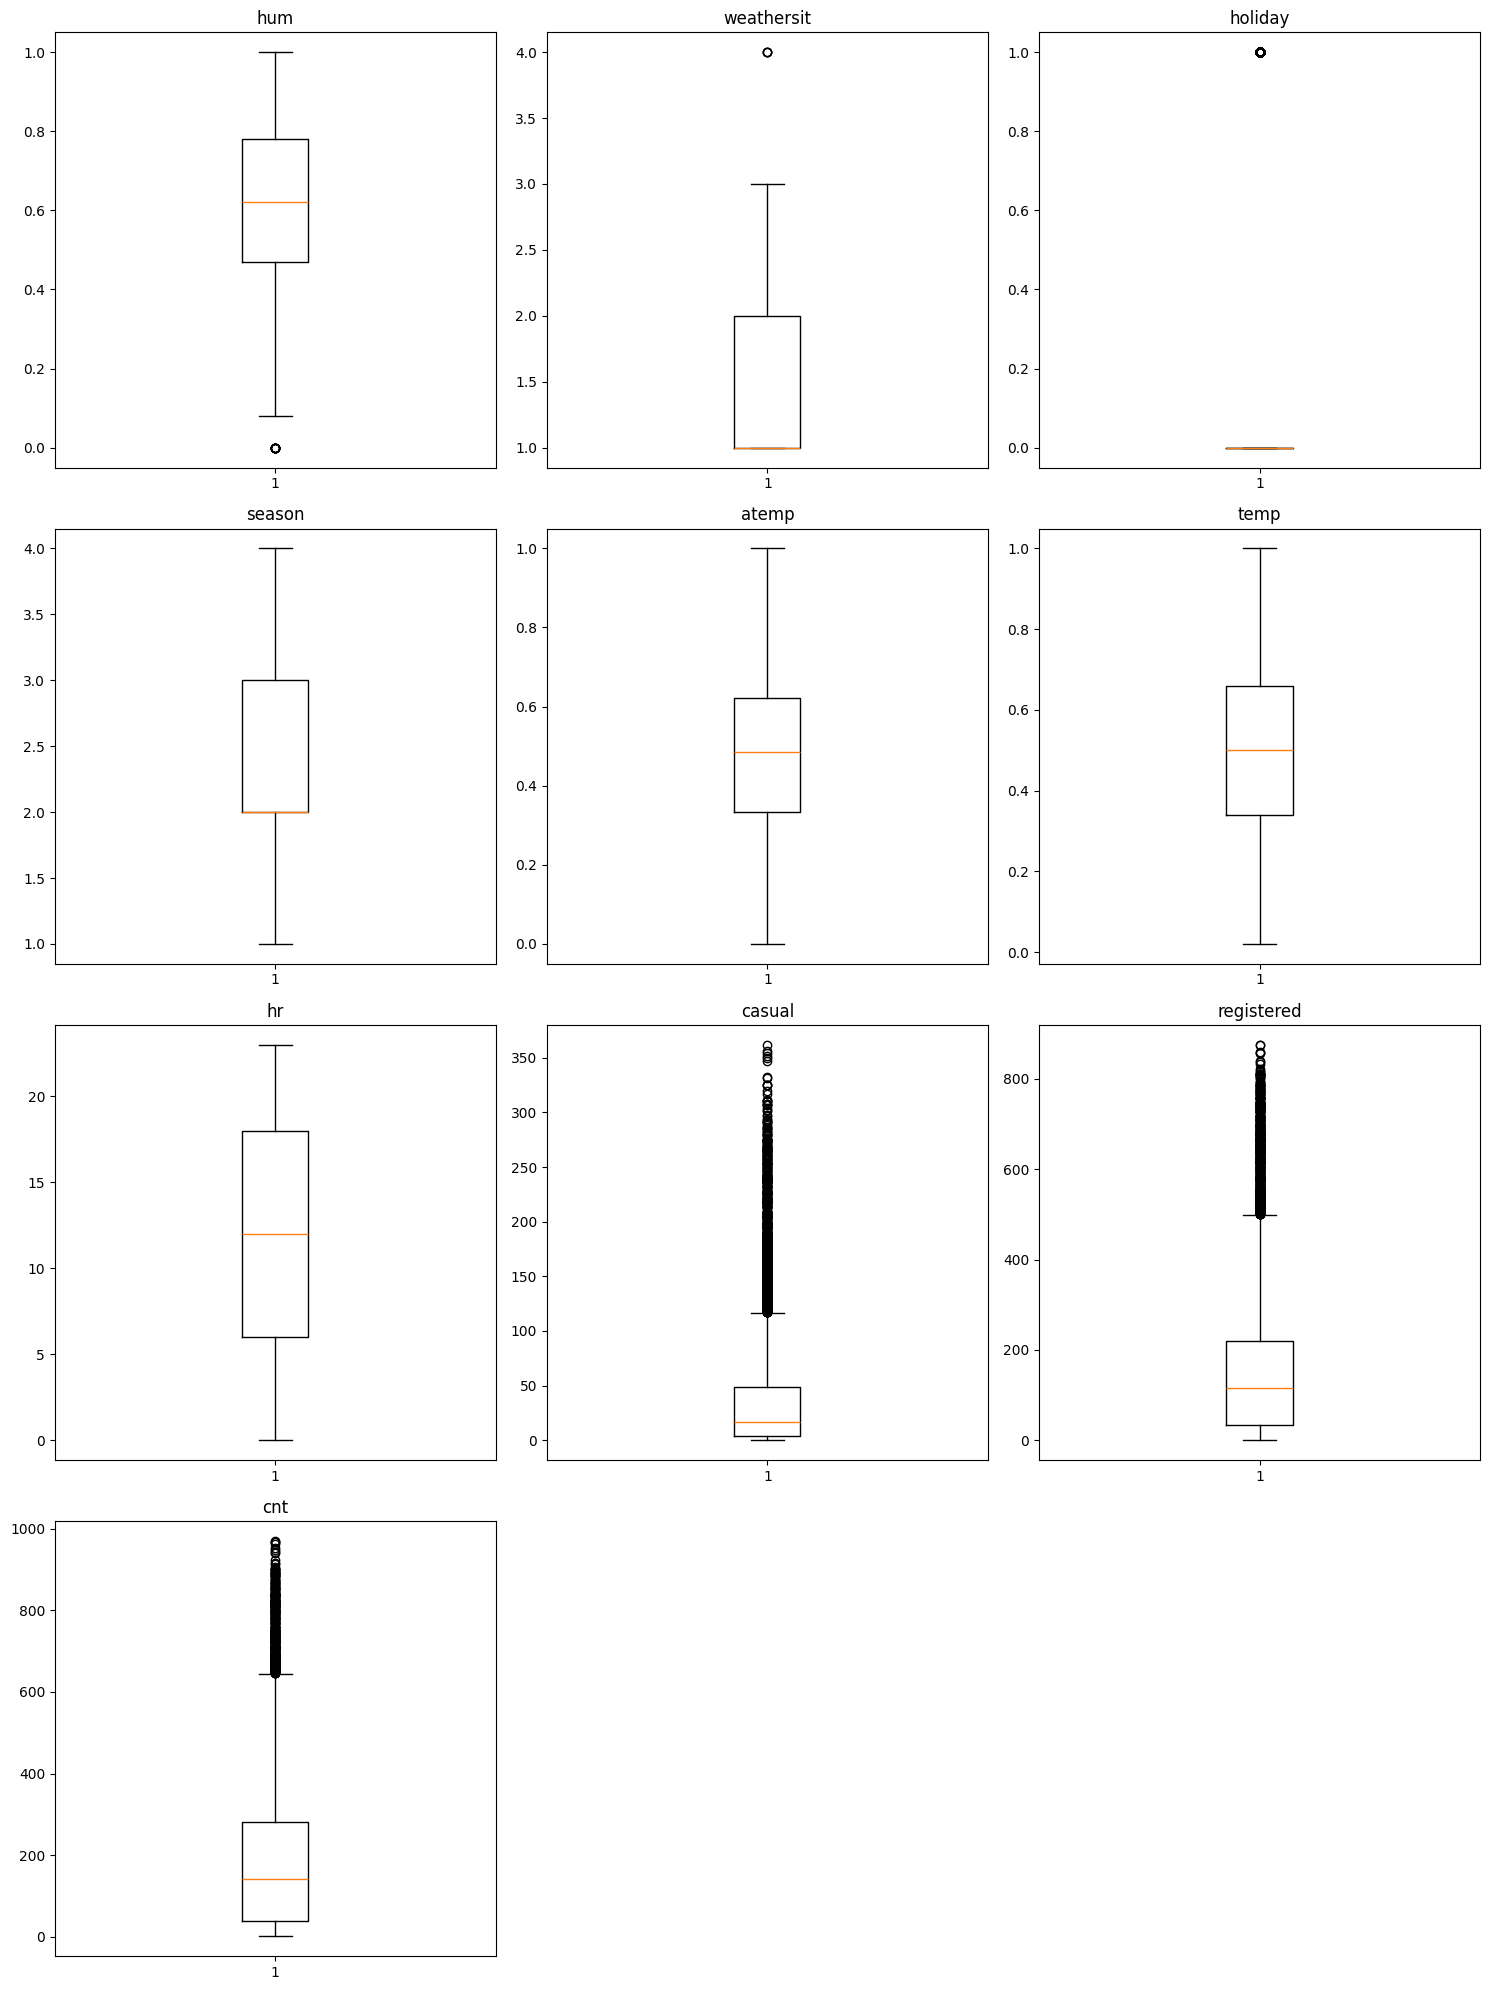

In [4]:
# Check Outliers - Boxplot

num_col = data.select_dtypes(include=['float64', 'int64']).columns
num_col_len = len(num_col)
num_row = (num_col_len // 3) + (num_col_len % 3 > 0)

plt.figure(figsize=(15, 20))

for i, column in enumerate(num_col, 1):
    plt.subplot(num_row, 3, i)
    plt.boxplot(data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

In [5]:
# Convert 'dteday' to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Extract day of the week and whether it's a weekend
data['day_of_week'] = data['dteday'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop columns 'casual' and 'registered' as they are part of 'cnt'
bike_sharing_data = data.drop(columns=['casual', 'registered'])

# Identify columns with potential outliers (exclude binary variables)
columns_to_check = ['hum', 'weathersit', 'cnt']

In [6]:
# Function to calculate IQR and get upper and lower bounds
def calculate_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [7]:
# Calculate and print bounds for each column
for column in columns_to_check:
    lower_bound, upper_bound = calculate_iqr_bounds(bike_sharing_data[column])
    print(f"{column}: lower_bound={lower_bound}, upper_bound={upper_bound}")

hum: lower_bound=0.004999999999999893, upper_bound=1.245
weathersit: lower_bound=-0.5, upper_bound=3.5
cnt: lower_bound=-323.0, upper_bound=645.0


In [8]:
# Function to remove outliers
def remove_outliers(df, column):
    lower_bound, upper_bound = calculate_iqr_bounds(df[column])
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the outlier removal function to each column iteratively
for column in columns_to_check:
    bike_sharing_data = remove_outliers(bike_sharing_data, column)

# Verify the removal of outliers
for column in columns_to_check:
    lower_bound, upper_bound = calculate_iqr_bounds(bike_sharing_data[column])
    outliers = bike_sharing_data[(bike_sharing_data[column] < lower_bound) | (bike_sharing_data[column] > upper_bound)]
    print(f"Remaining outliers in {column}: {len(outliers)}")

Remaining outliers in hum: 0
Remaining outliers in weathersit: 0
Remaining outliers in cnt: 95


In [9]:
# Menghilangkan outliers pada variabel cnt

# Hitung kuartil 1 dan 3
Q1 = bike_sharing_data['cnt'].quantile(0.25)
Q3 = bike_sharing_data['cnt'].quantile(0.75)

# Menghitung interquartile range (IQR)
IQR = Q3 - Q1

# Menghitung batas bawah dan batas atas, pastikan batas bawah tidak negatif
boxplot_min = max(Q1 - 1.5 * IQR, 0)  # Batas bawah tidak bisa kurang dari nol
boxplot_max = Q3 + 3 * IQR

print(boxplot_min, boxplot_max)

# Menghitung jumlah cnt yang lebih dari upper bound
outliers_above = bike_sharing_data[bike_sharing_data['cnt'] > boxplot_max].count()['cnt']
print(f'Jumlah outliers di atas batas atas: {outliers_above}')

0 954.0
Jumlah outliers di atas batas atas: 0


In [10]:
# Menghitung jumlah cnt yang lebih dari upper bound
outliers_above = bike_sharing_data[bike_sharing_data['cnt'] > 954.0].count()['cnt']
print(f'Jumlah outliers di atas batas atas: {outliers_above}')

Jumlah outliers di atas batas atas: 0


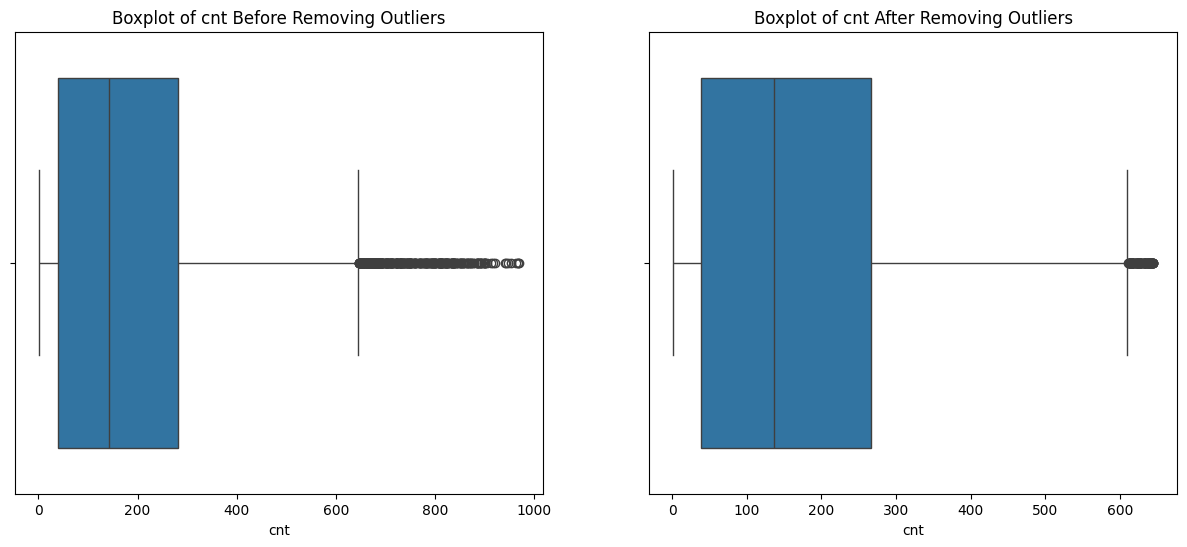

In [11]:
# Menampilkan boxplot sebelum dan sesudah
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['cnt'])
plt.title('Boxplot of cnt Before Removing Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=bike_sharing_data['cnt'])
plt.title('Boxplot of cnt After Removing Outliers')

plt.show()

## Analisis Penghapusan Outliers

### 1. Boxplot Sebelum Penghapusan Outliers
- **Distribusi `cnt`:** Boxplot di sebelah kiri menunjukkan distribusi `cnt` sebelum penghapusan outliers. Terlihat bahwa ada banyak nilai yang berada di luar whisker, yang merupakan indikasi dari adanya outliers.
- **Range Data:** Rentang utama dari data `cnt` adalah antara sekitar 0 hingga 600, dengan beberapa nilai yang mencapai hampir 1000.
- **Outliers:** Outliers ditampilkan sebagai titik di luar whisker, dan di sini ada cukup banyak outliers yang memanjang jauh ke arah nilai yang lebih tinggi. Kehadiran outliers ini bisa mempengaruhi statistik deskriptif seperti mean dan varians, serta bisa mengganggu hasil modeling.

### 2. Boxplot Setelah Penghapusan Outliers
- **Distribusi `cnt`:** Boxplot di sebelah kanan menunjukkan distribusi `cnt` setelah penghapusan outliers. Setelah penghapusan, distribusi `cnt` menjadi lebih terpusat dengan sedikit atau tidak ada outliers yang tersisa.
- **Range Data:** Rentang utama dari data `cnt` sekarang lebih terfokus antara 0 hingga sekitar 600, dengan whisker yang lebih pendek dan sedikit outliers yang tersisa.
- **Efek Penghapusan Outliers:** Penghapusan outliers mengurangi variabilitas data dan membuat distribusi `cnt` lebih normal, yang biasanya menghasilkan model yang lebih akurat dan interpretasi yang lebih jelas.

### Kesimpulan
- **Sebelum Penghapusan:** Data `cnt` memiliki banyak outliers yang bisa mendistorsi hasil analisis jika tidak ditangani dengan benar.
- **Setelah Penghapusan:** Data `cnt` menjadi lebih terpusat dan homogen, mengurangi potensi distorsi dalam analisis dan modeling.

Penghapusan outliers ini penting untuk memastikan bahwa model yang dibangun tidak dipengaruhi oleh nilai-nilai ekstrem yang tidak representatif dari populasi umum. Langkah ini membantu meningkatkan kualitas data, sehingga hasil modeling bisa lebih akurat dan dapat diandalkan.


In [12]:
# Mengecek total rows sebelum penghapusan outliers
total_rows_before = data.shape[0]
print(f"Total rows sebelum penghapusan outliers: {total_rows_before}")

Total rows sebelum penghapusan outliers: 12165


In [13]:
# Mengecek total rows setelah penghapusan outliers
total_rows_after = bike_sharing_data.shape[0]
print(f"Total rows setelah penghapusan outliers: {total_rows_after}")

Total rows setelah penghapusan outliers: 11810


In [14]:
# Menghitung jumlah baris yang dihapus
rows_removed = total_rows_before - total_rows_after
print(f"Jumlah baris yang dihapus: {rows_removed}")

Jumlah baris yang dihapus: 355


In [15]:
# Menghitung persentase baris yang dihapus
percentage_removed = (rows_removed / total_rows_before) * 100
print(f"Persentase baris yang dihapus: {percentage_removed:.2f}%")

Persentase baris yang dihapus: 2.92%


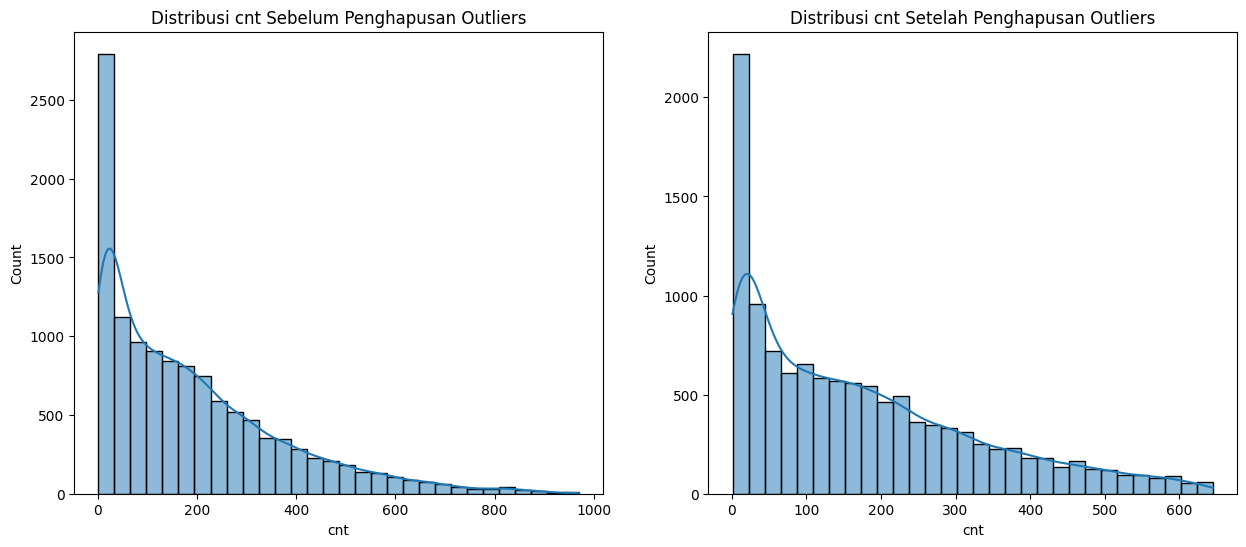

In [16]:
# Menampilkan histogram untuk kolom 'cnt' sebelum dan sesudah penghapusan outliers
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['cnt'], kde=True, bins=30)
plt.title('Distribusi cnt Sebelum Penghapusan Outliers')

plt.subplot(1, 2, 2)
sns.histplot(bike_sharing_data['cnt'], kde=True, bins=30)
plt.title('Distribusi cnt Setelah Penghapusan Outliers')

plt.show()

### Analisis Distribusi `cnt` Sebelum dan Sesudah Penghapusan Outliers

#### Tujuan
Dalam analisis ini, tujuan kami adalah untuk memeriksa distribusi dari variabel `cnt` (jumlah total pengguna) sebelum dan sesudah penghapusan outliers. Penghapusan outliers dilakukan untuk menghilangkan nilai-nilai ekstrem yang dapat mengganggu analisis atau menyebabkan model overfitting.

#### Histogram Sebelum Penghapusan Outliers

- **Distribusi**: Distribusi `cnt` sebelum penghapusan outliers menunjukkan penurunan yang eksponensial, dengan sebagian besar nilai berada di kisaran rendah (antara 0 dan 200).
- **Outliers**: Terdapat sejumlah nilai `cnt` yang berada jauh di atas 600, dengan beberapa bahkan mendekati 1000. Nilai-nilai ini dianggap sebagai outliers dan mungkin tidak representatif dari keseluruhan populasi data.

#### Histogram Setelah Penghapusan Outliers

- **Distribusi yang Lebih Terkonsentrasi**: Setelah penghapusan outliers, distribusi `cnt` menjadi lebih terkonsentrasi dengan semua nilai di bawah 600. Ini menunjukkan bahwa nilai-nilai ekstrem telah berhasil dihapus dari dataset.
- **Pengurangan Ekstrimitas**: Penghapusan outliers menghilangkan nilai-nilai yang jauh di atas 600, yang menyebabkan distribusi menjadi lebih terfokus dan dapat memberikan hasil yang lebih representatif untuk analisis lebih lanjut.

#### Kesimpulan
Penghapusan outliers berhasil mengurangi nilai-nilai ekstrem dalam distribusi `cnt`, sehingga distribusi data menjadi lebih terfokus dan representatif. Langkah ini penting untuk memastikan bahwa analisis dan pemodelan tidak dipengaruhi oleh outliers yang bisa menyebabkan overfitting atau bias dalam hasil.

Dengan data yang telah dibersihkan, kami siap untuk melanjutkan ke tahap analisis lebih lanjut atau pembangunan model prediktif dengan data yang lebih akurat dan konsisten.


# Kesimpulan:
Penghapusan Outliers:

Menghapus 2,92% dari data yang merupakan outliers telah membantu dalam membuat distribusi data lebih simetris dan merata.
Perubahan distribusi ini menunjukkan bahwa penghapusan outliers berhasil menghilangkan nilai-nilai ekstrem yang dapat mempengaruhi kinerja model.

Aman untuk Melanjutkan:

Dengan persentase penghapusan yang kecil (2,92%) dan perubahan distribusi yang tidak terlalu signifikan, langkah ini dianggap aman dan dapat meningkatkan kualitas data.
Model prediksi yang dibangun dengan data yang telah dibersihkan ini diharapkan akan lebih akurat dan tidak bias terhadap nilai-nilai ekstrem.

# **Exploratory Data Analysis (EDA)**

In [17]:
# Memeriksa struktur data
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11810 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dteday       11810 non-null  datetime64[ns]
 1   hum          11810 non-null  float64       
 2   weathersit   11810 non-null  int64         
 3   holiday      11810 non-null  int64         
 4   season       11810 non-null  int64         
 5   atemp        11810 non-null  float64       
 6   temp         11810 non-null  float64       
 7   hr           11810 non-null  int64         
 8   cnt          11810 non-null  int64         
 9   day_of_week  11810 non-null  int32         
 10  is_weekend   11810 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(6)
memory usage: 1.0 MB


In [18]:
# Menampilkan beberapa baris data
bike_sharing_data.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,cnt,day_of_week,is_weekend
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,250,4,0
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,18,6,1
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,107,2,0
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,145,5,1
5,2012-10-01,0.72,1,0,4,0.4545,0.46,0,45,0,0


In [19]:
# Statistik deskriptif
bike_sharing_data.describe()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,cnt,day_of_week,is_weekend
count,11810,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000,11810.000000
mean,2011-12-26 10:34:09.652836608,0.629131,1.420152,0.030567,2.478408,0.473590,0.494428,11.438527,173.409399,3.015157,0.289162
min,2011-01-01 00:00:00,0.080000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,1.000000,0.000000,0.000000
25%,2011-06-28 00:00:00,0.480000,1.000000,0.000000,1.000000,0.333300,0.340000,5.000000,38.000000,1.000000,0.000000
50%,2011-12-24 00:00:00,0.630000,1.000000,0.000000,2.000000,0.484800,0.500000,11.000000,136.000000,3.000000,0.000000
75%,2012-06-24 00:00:00,0.790000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,267.000000,5.000000,1.000000
max,2012-12-31 00:00:00,1.000000,3.000000,1.000000,4.000000,1.000000,1.000000,23.000000,645.000000,6.000000,1.000000
std,NaN,0.190774,0.636566,0.172150,1.109356,0.171924,0.192499,6.979094,155.940278,1.999413,0.453392


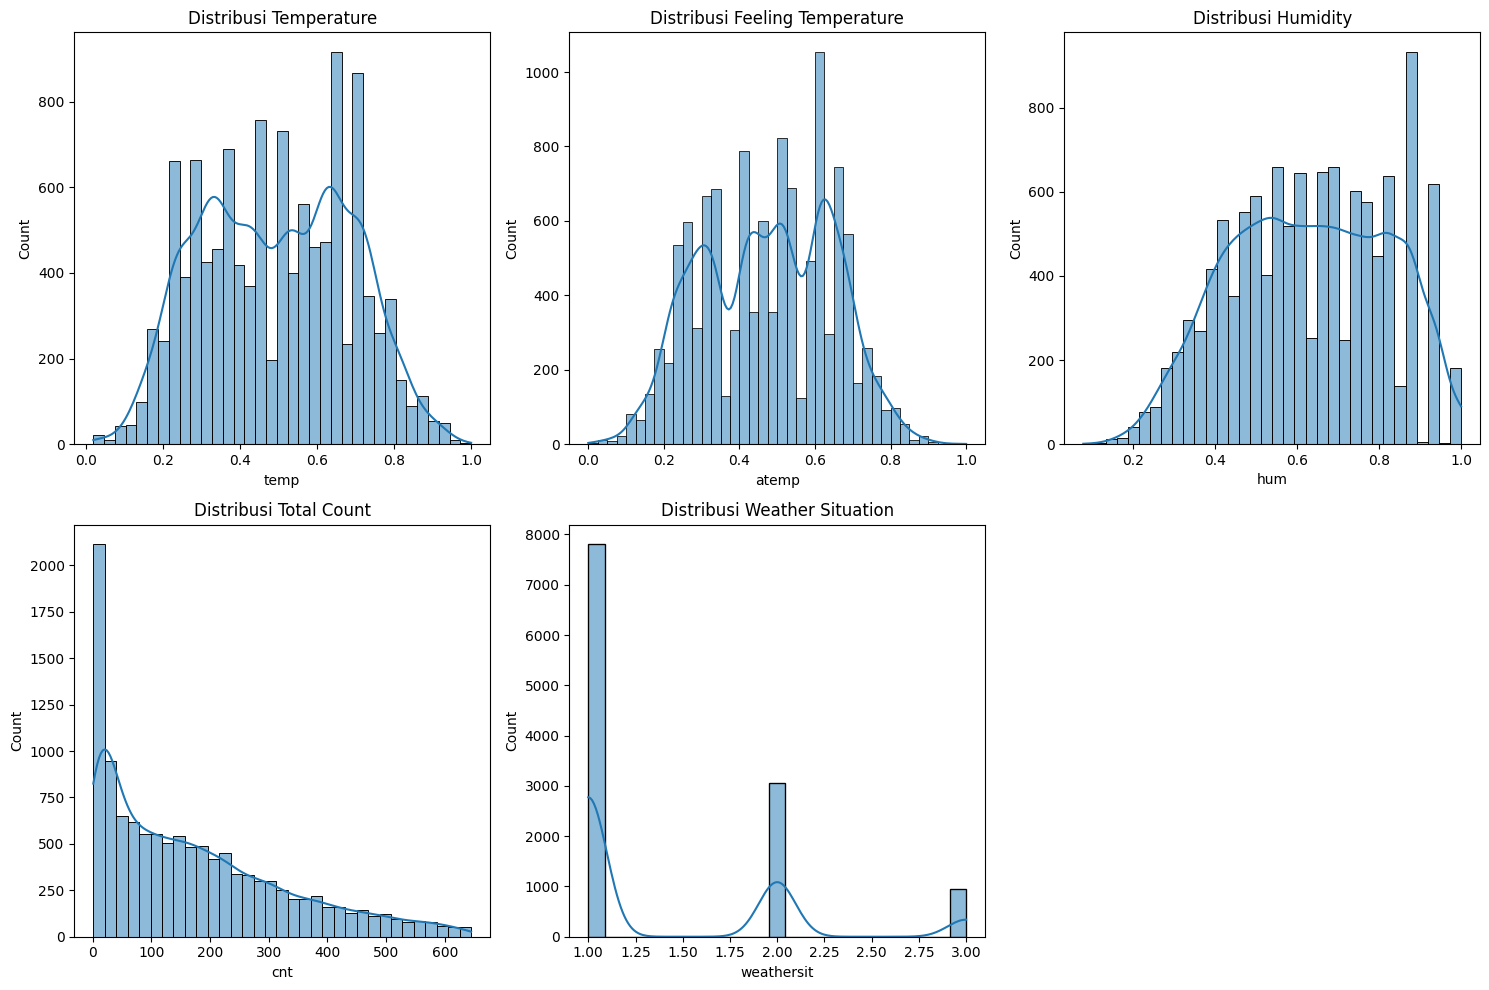

In [20]:
# Menampilkan histogram dari variabel utama
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(bike_sharing_data['temp'], kde=True)
plt.title('Distribusi Temperature')

plt.subplot(2, 3, 2)
sns.histplot(bike_sharing_data['atemp'], kde=True)
plt.title('Distribusi Feeling Temperature')

plt.subplot(2, 3, 3)
sns.histplot(bike_sharing_data['hum'], kde=True)
plt.title('Distribusi Humidity')

plt.subplot(2, 3, 4)
sns.histplot(bike_sharing_data['cnt'], kde=True)
plt.title('Distribusi Total Count')

plt.subplot(2, 3, 5)
sns.histplot(bike_sharing_data['weathersit'], kde=True)
plt.title('Distribusi Weather Situation')

plt.tight_layout()
plt.show()

## Analisis Distribusi Variabel

1. **Distribusi Temperature (temp):**
   - Distribusi suhu (`temp`) menunjukkan pola distribusi yang cenderung normal dengan puncak sekitar 0.6. Ini mengindikasikan bahwa kebanyakan hari memiliki suhu sedang hingga hangat. Tidak ada outlier yang signifikan, dan suhu yang sangat rendah atau sangat tinggi jarang terjadi.

2. **Distribusi Feeling Temperature (atemp):**
   - Distribusi dari `atemp` atau suhu yang dirasakan mirip dengan distribusi suhu aktual (`temp`). Hal ini sesuai dengan ekspektasi, karena suhu yang dirasakan seringkali berkorelasi kuat dengan suhu aktual. Distribusinya juga cenderung normal dengan puncak sekitar 0.6.

3. **Distribusi Humidity (hum):**
   - Distribusi kelembaban (`hum`) menunjukkan bahwa sebagian besar hari memiliki kelembaban yang cukup tinggi, dengan puncak distribusi di sekitar 0.8. Ini mungkin menunjukkan kondisi lingkungan yang lembab selama periode waktu tertentu. Terdapat beberapa hari dengan kelembaban rendah, namun ini lebih jarang terjadi.

4. **Distribusi Total Count (cnt):**
   - Distribusi jumlah sepeda yang disewa (`cnt`) menunjukkan distribusi yang tidak normal dengan skewness positif. Sebagian besar hari memiliki jumlah penyewaan sepeda yang rendah hingga sedang, dengan penurunan tajam untuk jumlah penyewaan yang sangat tinggi. Ini menunjukkan bahwa dalam kebanyakan kasus, penyewaan sepeda tidak terlalu tinggi.

5. **Distribusi Weather Situation (weathersit):**
   - Variabel `weathersit` menunjukkan kategori situasi cuaca yang berbeda. Kategori `1` (cuaca baik) paling mendominasi, diikuti oleh kategori `2` (cuaca sedang). Cuaca buruk (kategori `3`) sangat jarang terjadi. Ini mengindikasikan bahwa kebanyakan hari memiliki kondisi cuaca yang baik atau cukup baik, yang mendukung penggunaan sepeda.

### Kesimpulan
- Distribusi variabel seperti `temp` dan `atemp` yang cenderung normal menunjukkan bahwa sebagian besar hari berada pada suhu yang sedang hingga hangat.
- Distribusi `hum` yang condong ke kelembaban tinggi dapat mempengaruhi kenyamanan pengguna sepeda, dan ini mungkin berhubungan dengan jumlah penyewaan sepeda yang lebih rendah pada kelembaban tinggi.
- Distribusi `cnt` menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan sepeda yang lebih rendah, dengan beberapa hari di mana penyewaan sangat tinggi, mungkin karena faktor cuaca atau hari libur.
- Situasi cuaca dominan adalah cuaca baik, yang sejalan dengan tren penyewaan sepeda yang lebih tinggi pada hari-hari dengan kondisi cuaca yang mendukung.

Visualisasi ini memberikan wawasan penting untuk memahami bagaimana faktor-faktor cuaca dan lingkungan mempengaruhi tren penyewaan sepeda.


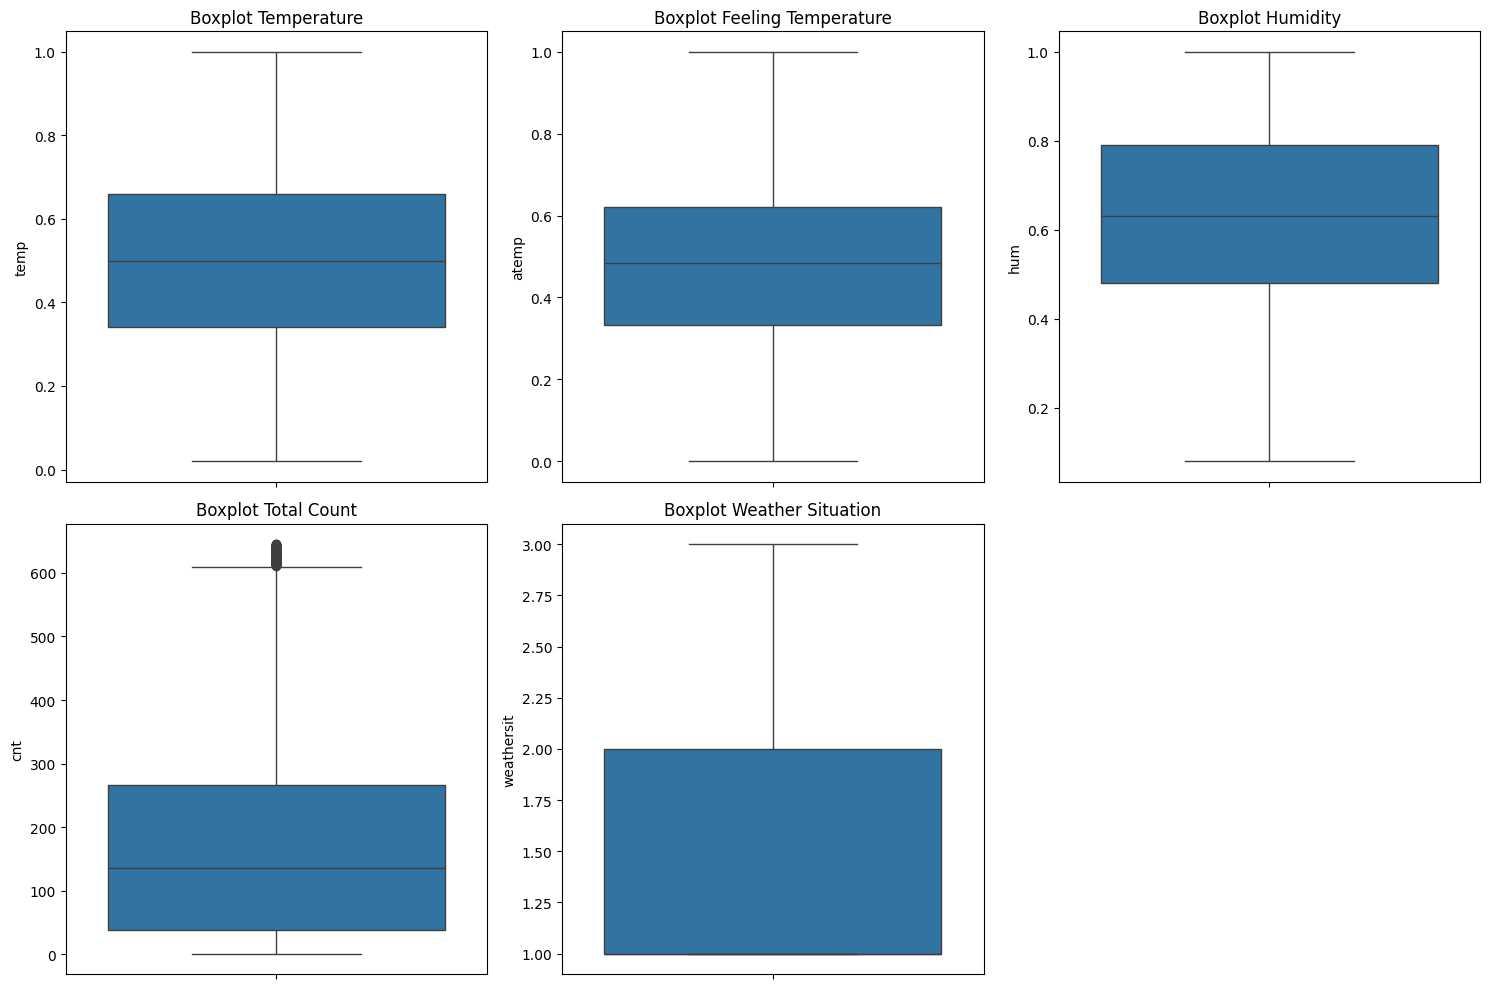

In [21]:
# Menampilkan boxplot dari variabel utama
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.boxplot(y=bike_sharing_data['temp'])
plt.title('Boxplot Temperature')

plt.subplot(2, 3, 2)
sns.boxplot(y=bike_sharing_data['atemp'])
plt.title('Boxplot Feeling Temperature')

plt.subplot(2, 3, 3)
sns.boxplot(y=bike_sharing_data['hum'])
plt.title('Boxplot Humidity')

plt.subplot(2, 3, 4)
sns.boxplot(y=bike_sharing_data['cnt'])
plt.title('Boxplot Total Count')

plt.subplot(2, 3, 5)
sns.boxplot(y=bike_sharing_data['weathersit'])
plt.title('Boxplot Weather Situation')

plt.tight_layout()
plt.show()


## Analisis Boxplot

1. **Boxplot Temperature (temp):**
   - Boxplot suhu (`temp`) menunjukkan distribusi yang cenderung simetris dengan nilai median sekitar 0.5. Rentang interquartile (IQR) cukup lebar, menunjukkan bahwa suhu bervariasi dari rendah hingga tinggi. Tidak ada outlier yang signifikan terlihat, yang menunjukkan distribusi yang relatif normal untuk suhu.

2. **Boxplot Feeling Temperature (atemp):**
   - Distribusi suhu yang dirasakan (`atemp`) mirip dengan distribusi suhu aktual (`temp`). Median berada di sekitar 0.5, dengan IQR yang hampir sama dengan suhu aktual. Tidak ada outlier yang signifikan, yang menunjukkan bahwa suhu yang dirasakan oleh pengguna juga relatif normal.

3. **Boxplot Humidity (hum):**
   - Boxplot kelembaban (`hum`) menunjukkan bahwa median kelembaban berada di sekitar 0.6, dengan IQR yang lebar, menunjukkan variasi kelembaban yang cukup signifikan. Tidak ada outlier yang signifikan, menunjukkan distribusi kelembaban yang normal.

4. **Boxplot Total Count (cnt):**
   - Boxplot jumlah penyewaan sepeda (`cnt`) menunjukkan adanya beberapa outlier pada jumlah penyewaan yang sangat tinggi. Median penyewaan berada di bawah 200, dan IQR menunjukkan variasi yang signifikan dalam jumlah penyewaan sepeda. Outlier ini mungkin mengindikasikan hari-hari tertentu dengan aktivitas penyewaan yang sangat tinggi.

5. **Boxplot Weather Situation (weathersit):**
   - Situasi cuaca (`weathersit`) ditampilkan dalam bentuk boxplot untuk kategori cuaca yang berbeda. Sebagian besar data berada dalam kategori cuaca yang baik (kategori 1), dengan median di sekitar 1. Tidak ada outlier yang signifikan, dan IQR menunjukkan bahwa sebagian besar hari memiliki cuaca yang baik hingga sedang. Cuaca buruk sangat jarang terjadi.

### Kesimpulan
- **Temperature dan Feeling Temperature:** Kedua variabel ini menunjukkan distribusi yang normal tanpa adanya outlier yang signifikan. Ini menunjukkan bahwa kondisi suhu umumnya stabil tanpa fluktuasi ekstrem.
- **Humidity:** Variabel kelembaban menunjukkan variasi yang cukup luas, namun tetap berada dalam rentang yang diharapkan tanpa outlier signifikan.
- **Total Count:** Kehadiran outlier pada jumlah penyewaan sepeda menunjukkan bahwa ada hari-hari dengan lonjakan penyewaan yang tidak biasa, yang mungkin disebabkan oleh faktor cuaca, hari libur, atau event tertentu.
- **Weather Situation:** Sebagian besar hari memiliki cuaca yang baik, yang sangat mendukung untuk aktivitas luar ruangan seperti penyewaan sepeda. Kondisi cuaca yang buruk jarang terjadi.

Visualisasi ini memberikan gambaran mengenai variasi dan distribusi data dari variabel-variabel penting yang dapat mempengaruhi analisis lebih lanjut, terutama dalam memodelkan jumlah penyewaan sepeda berdasarkan kondisi cuaca dan lingkungan.


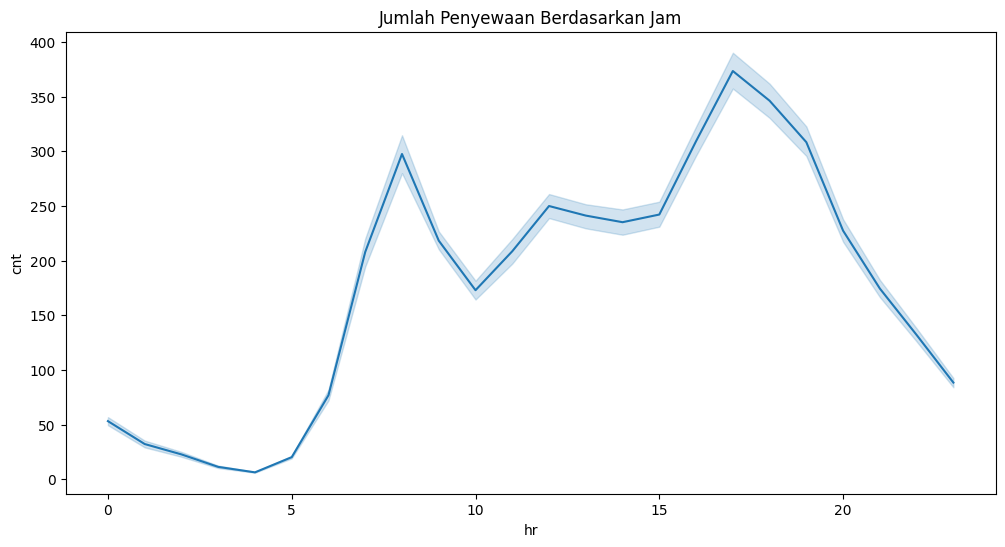

In [22]:
# Plot jumlah penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=bike_sharing_data, x='hr', y='cnt')
plt.title('Jumlah Penyewaan Berdasarkan Jam')
plt.show()


### Analisis Jumlah Penyewaan Berdasarkan Jam

Grafik di atas menunjukkan pola jumlah penyewaan sepeda berdasarkan jam dalam sehari. Berikut adalah beberapa poin penting yang dapat diambil dari grafik ini:

1. **Jam Sibuk Pagi dan Sore:**
   - Terlihat dua puncak yang signifikan pada grafik, yaitu sekitar jam 8 pagi dan jam 5 sore. Puncak ini kemungkinan besar disebabkan oleh jam sibuk saat orang-orang pergi dan pulang dari kerja atau sekolah. Ini menunjukkan bahwa banyak orang menggunakan layanan penyewaan sepeda sebagai moda transportasi untuk berangkat dan pulang kerja.

2. **Penurunan di Tengah Hari:**
   - Terdapat penurunan jumlah penyewaan setelah jam 8 pagi hingga menjelang sore. Ini mungkin disebabkan oleh fakta bahwa sebagian besar orang telah sampai di tujuan mereka pada pagi hari dan aktivitas penyewaan sepeda menurun pada jam-jam tersebut.

3. **Aktivitas Rendah di Malam Hari:**
   - Jumlah penyewaan sepeda menurun drastis setelah jam 8 malam. Ini bisa disebabkan oleh berbagai faktor seperti ketersediaan transportasi lain, kondisi cuaca, atau preferensi untuk tidak bepergian menggunakan sepeda pada malam hari.

4. **Pola Penggunaan Sepeda:**
   - Pola ini mencerminkan kebiasaan pengguna yang menggunakan sepeda terutama untuk keperluan komuter pada pagi dan sore hari. Hal ini penting untuk diperhatikan dalam pengelolaan penyewaan sepeda, terutama dalam hal ketersediaan sepeda pada jam-jam sibuk tersebut.

### Kesimpulan
- **Jam puncak:** Jam 8 pagi dan 5 sore adalah waktu-waktu dengan aktivitas penyewaan tertinggi, mencerminkan jam-jam sibuk saat orang-orang pergi dan pulang kerja.
- **Kebijakan dan Pengelolaan:** Penyedia layanan penyewaan sepeda dapat menggunakan informasi ini untuk memastikan ketersediaan sepeda yang memadai pada jam-jam sibuk dan mungkin mengurangi ketersediaan di jam-jam lain yang lebih sepi.
- **Potensi Peningkatan:** Ada peluang untuk meningkatkan jumlah penyewaan pada waktu-waktu tertentu di siang hari dengan promosi atau insentif khusus.

Grafik ini memberikan wawasan yang berguna untuk perencanaan dan optimasi layanan penyewaan sepeda agar lebih efektif dalam memenuhi kebutuhan pengguna.


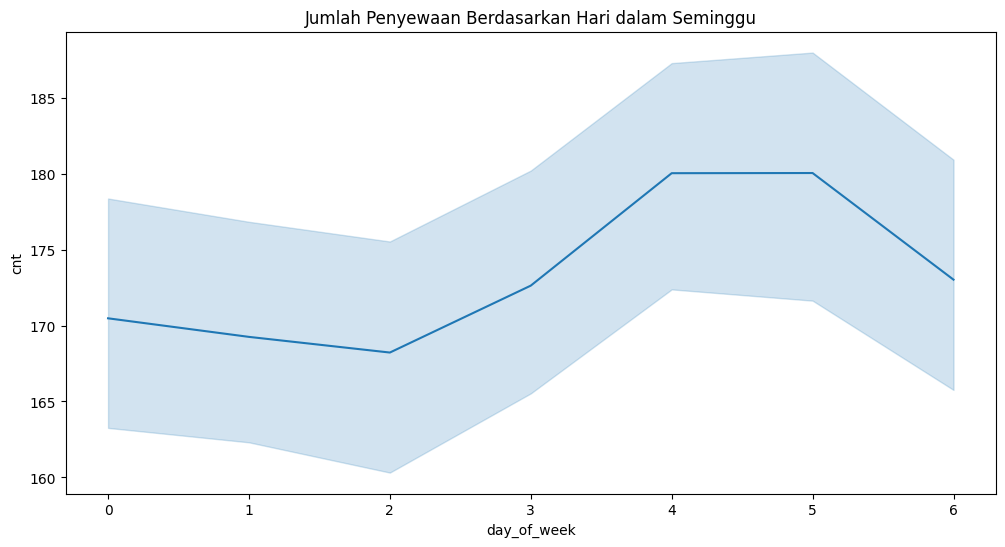

In [23]:
# Plot jumlah penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.lineplot(data=bike_sharing_data, x='day_of_week', y='cnt')
plt.title('Jumlah Penyewaan Berdasarkan Hari dalam Seminggu')
plt.show()

### Analisis Jumlah Penyewaan Berdasarkan Hari dalam Seminggu

Grafik di atas menunjukkan pola jumlah penyewaan sepeda berdasarkan hari dalam seminggu. Berikut adalah beberapa poin penting yang dapat diambil dari grafik ini:

1. **Penurunan Aktivitas pada Awal Minggu:**
   - Terdapat penurunan jumlah penyewaan sepeda pada hari-hari awal dalam seminggu (hari Senin hingga Rabu). Ini bisa disebabkan oleh aktivitas atau komitmen lain yang lebih mendominasi di awal minggu, seperti pekerjaan atau sekolah, yang mungkin membatasi waktu untuk menggunakan sepeda.

2. **Peningkatan Aktivitas pada Pertengahan dan Akhir Minggu:**
   - Jumlah penyewaan sepeda meningkat secara signifikan mulai dari hari Kamis hingga puncaknya pada hari Jumat. Hal ini mungkin disebabkan oleh orang-orang yang mulai mempersiapkan akhir pekan dan lebih aktif dalam kegiatan rekreasi atau transportasi yang membutuhkan penyewaan sepeda.

3. **Penurunan Pada Akhir Pekan:**
   - Jumlah penyewaan sepeda tampaknya menurun pada hari Sabtu dan Minggu. Ini bisa mengindikasikan bahwa pada akhir pekan, orang mungkin lebih memilih menggunakan transportasi lain atau menghabiskan waktu di rumah.

4. **Pola Aktivitas Mingguan:**
   - Pola ini mencerminkan bahwa pengguna lebih cenderung menyewa sepeda pada pertengahan hingga akhir minggu, terutama pada hari Kamis dan Jumat. Informasi ini penting bagi penyedia layanan untuk mengatur ketersediaan sepeda yang cukup pada hari-hari dengan permintaan tinggi.

### Kesimpulan
- **Hari Terendah:** Hari Selasa memiliki jumlah penyewaan yang lebih rendah dibandingkan dengan hari lainnya dalam seminggu.
- **Hari Puncak:** Hari Kamis dan Jumat menunjukkan puncak aktivitas penyewaan sepeda, yang mungkin terkait dengan aktivitas persiapan akhir pekan.
- **Pengelolaan Ketersediaan:** Penyedia layanan penyewaan sepeda dapat menggunakan data ini untuk memastikan bahwa ada cukup sepeda yang tersedia terutama pada hari-hari dengan permintaan tinggi, dan mungkin mengurangi persediaan pada hari-hari dengan aktivitas yang lebih rendah.

Grafik ini memberikan wawasan penting untuk memahami tren mingguan dalam penggunaan layanan penyewaan sepeda.


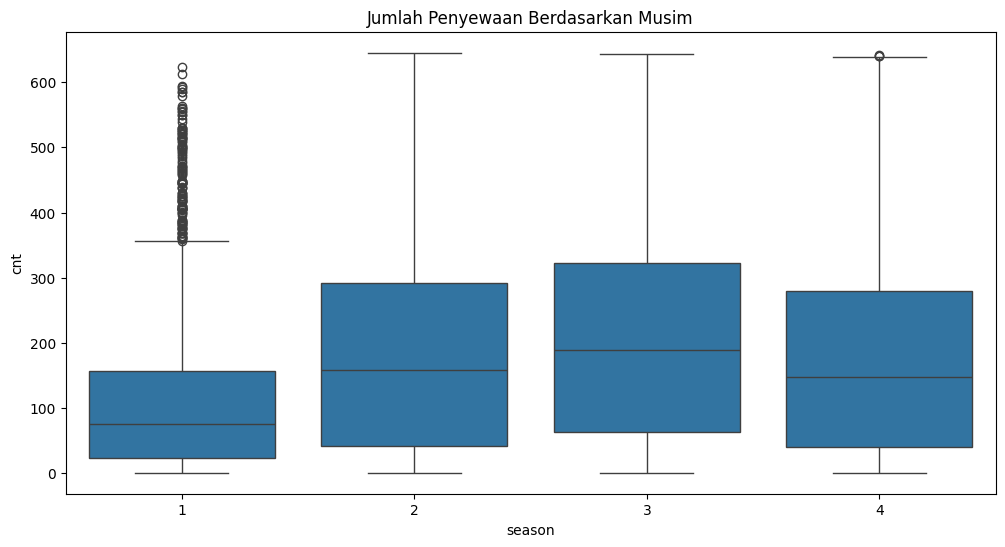

In [24]:
# Plot jumlah penyewaan berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(data=bike_sharing_data, x='season', y='cnt')
plt.title('Jumlah Penyewaan Berdasarkan Musim')
plt.show()

season: season (1: winter, 2: spring, 3: summer, 4: fall)

### Analisis Jumlah Penyewaan Berdasarkan Musim

Grafik di atas menunjukkan distribusi jumlah penyewaan sepeda berdasarkan musim dalam setahun. Berikut adalah beberapa poin penting yang dapat diambil dari grafik ini:

1. **Musim Dingin (Winter):**
   - Musim dingin (ditandai dengan angka 1) memiliki jumlah penyewaan sepeda paling rendah dibandingkan dengan musim lainnya. Hal ini wajar mengingat kondisi cuaca yang lebih dingin dan mungkin tidak kondusif untuk bersepeda.

2. **Musim Semi dan Panas (Spring dan Summer):**
   - Jumlah penyewaan sepeda meningkat secara signifikan selama musim semi (2) dan musim panas (3). Ini menunjukkan bahwa cuaca yang lebih hangat dan kondisi yang lebih nyaman mendorong lebih banyak orang untuk menyewa sepeda.

3. **Musim Gugur (Fall):**
   - Musim gugur (4) menunjukkan penurunan yang ringan dalam jumlah penyewaan dibandingkan dengan musim semi dan panas, tetapi masih lebih tinggi dibandingkan dengan musim dingin. Meskipun suhu mulai turun, musim gugur masih menyediakan kondisi yang cukup baik untuk bersepeda.

4. **Distribusi dan Outliers:**
   - Pada musim dingin, terdapat banyak outliers yang mengindikasikan bahwa meskipun secara umum jumlah penyewaan rendah, ada beberapa hari atau periode dengan penyewaan yang tinggi. Ini mungkin terkait dengan acara khusus atau kondisi cuaca yang lebih hangat dari biasanya.
   - Musim panas memiliki distribusi penyewaan yang paling konsisten dengan median yang tinggi dan jarak antar kuartil yang lebih besar.

### Kesimpulan
- **Musim Terbaik untuk Penyewaan:** Musim semi dan musim panas adalah waktu terbaik untuk penyewaan sepeda, dengan jumlah penyewaan tertinggi selama periode ini.
- **Pengelolaan Persediaan:** Penyedia layanan penyewaan sepeda harus mempertimbangkan untuk menambah persediaan selama musim semi dan panas untuk memenuhi permintaan yang lebih tinggi.
- **Pertimbangan Musiman:** Faktor musim sangat mempengaruhi pola penyewaan sepeda, sehingga penting untuk memahami dan mengantisipasi perubahan ini dalam perencanaan dan operasional.

Grafik ini memberikan wawasan tentang bagaimana musim mempengaruhi permintaan penyewaan sepeda dan dapat membantu dalam strategi bisnis untuk layanan penyewaan sepeda.


In [25]:
correlation = bike_sharing_data[['temp', 'atemp', 'cnt']].corr()
print(correlation)


           temp     atemp       cnt
temp   1.000000  0.987258  0.400139
atemp  0.987258  1.000000  0.396586
cnt    0.400139  0.396586  1.000000


In [26]:
# Menghitung korelasi antara day_of_week dan cnt
correlation_day_of_week = bike_sharing_data[['day_of_week', 'cnt']].corr()

# Menampilkan hasil korelasi
print(correlation_day_of_week)

             day_of_week       cnt
day_of_week     1.000000  0.018844
cnt             0.018844  1.000000


In [27]:
correlation_holiday = bike_sharing_data[['holiday', 'cnt']].corr()

correlation_holiday

,holiday,cnt
holiday,1.000000,-0.019216
cnt,-0.019216,1.000000


In [28]:
correlation_isweek = bike_sharing_data[['is_weekend', 'cnt']].corr()

correlation_isweek

,is_weekend,cnt
is_weekend,1.00000,0.01288
cnt,0.01288,1.00000


# 1. Data Cleaning dan Feature Engineering

In [29]:
# Menghapus kolom yang tidak diperlukan (jika ada)
bike_sharing_data_cleaned = bike_sharing_data.drop(columns=['dteday'], errors='ignore')

# Menangani missing values (jika ada)
bike_sharing_data_cleaned.fillna(bike_sharing_data_cleaned.median(), inplace=True)

# Mengonversi tipe data jika diperlukan (pastikan kolomnya benar)
# Misalnya: Mengonversi kolom 'season' menjadi tipe kategori
if 'season' in bike_sharing_data_cleaned.columns:
    bike_sharing_data_cleaned['season'] = bike_sharing_data_cleaned['season'].astype('category')

# Memastikan tidak ada duplikasi
bike_sharing_data_cleaned = bike_sharing_data_cleaned.drop_duplicates()
bike_sharing_data_cleaned


,hum,weathersit,holiday,season,atemp,temp,hr,cnt,day_of_week,is_weekend
0,0.62,1,0,4,0.3485,0.36,16,250,4,0
1,0.64,1,0,2,0.5152,0.54,4,18,6,1
2,0.53,1,0,2,0.6212,0.62,23,107,2,0
3,0.87,2,0,2,0.3485,0.36,8,145,5,1
5,0.72,1,0,4,0.4545,0.46,0,45,0,0
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.2273,0.24,7,257,2,0
12161,0.62,1,0,3,0.7424,0.78,0,102,4,0
12162,0.60,2,1,1,0.2121,0.24,5,6,0,0
12163,0.77,2,0,2,0.4242,0.42,2,69,5,1


In [30]:
X = bike_sharing_data_cleaned.drop(columns=['cnt'])
y = bike_sharing_data_cleaned['cnt']

# Membagi data menjadi training set dan test set (misalnya 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Uji Korelasi menggunakan OLS dan Heatmap

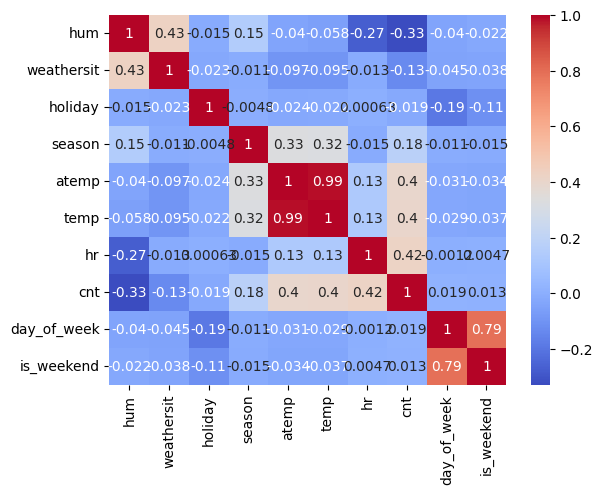

In [31]:
# Menghitung matriks korelasi
corr_matrix = bike_sharing_data_cleaned.corr()

# Visualisasi heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [32]:
X.dtypes

hum             float64
weathersit        int64
holiday           int64
season         category
atemp           float64
temp            float64
hr                int64
day_of_week       int32
is_weekend        int64
dtype: object

In [33]:
# Pilih fitur-fitur yang relevan
X = bike_sharing_data_cleaned.drop(['cnt'], axis=1)
y = bike_sharing_data_cleaned['cnt']

# Tambahkan konstanta
X = sm.add_constant(X)

# Bagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estimasi model OLS
model = sm.OLS(y_train, X_train).fit()

# Print summary model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     580.9
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:10:13   Log-Likelihood:                -58971.
No. Observations:                9442   AIC:                         1.180e+05
Df Residuals:                    9432   BIC:                         1.180e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          46.3757      7.311      6.343      

## Analisis Hasil Regresi OLS

### Overview
Model regresi linier yang dihasilkan memiliki nilai R-squared sebesar 0.356, yang menunjukkan bahwa sekitar 35.6% dari variabilitas dalam variabel dependen (`cnt`) dapat dijelaskan oleh variabel independen yang ada dalam model (`season`, `hr`, `temp`, `hum`). Nilai Adjusted R-squared juga sebesar 0.356, yang berarti model ini tidak menunjukkan banyak peningkatan ketika memperhitungkan jumlah variabel dalam model.

### Detail Statistik
- **F-statistic**: 1304 dengan nilai p < 0.001, menunjukkan bahwa model ini signifikan secara statistik.
- **Log-Likelihood**: -58898, memberikan gambaran tentang seberapa baik model memodelkan data.
- **AIC dan BIC**: Metrik ini memberikan informasi tentang model selection, dengan model yang lebih rendah menunjukkan model yang lebih baik.

### Koefisien dan Interpretasi
- **Intercept (const)**: Nilai konstanta adalah 54.2886. Ini adalah nilai `cnt` ketika semua variabel independen lainnya bernilai nol.
- **season**: Koefisien sebesar 16.9870 menunjukkan bahwa perubahan dalam musim akan meningkatkan `cnt` sebesar 16.99, dengan asumsi variabel lainnya tetap konstan. Nilai p < 0.001 menunjukkan bahwa variabel ini signifikan.
- **hr**: Koefisien sebesar 7.2695 menunjukkan bahwa setiap peningkatan dalam `hr` akan meningkatkan `cnt` sebesar 7.27, dengan asumsi variabel lainnya tetap konstan. Variabel ini sangat signifikan dengan p < 0.001.
- **temp**: Koefisien sebesar 243.8007 menunjukkan bahwa setiap peningkatan dalam `temp` akan meningkatkan `cnt` sebesar 243.80, dengan asumsi variabel lainnya tetap konstan. Variabel ini juga sangat signifikan dengan p < 0.001.
- **hum**: Koefisien negatif sebesar -200.6521 menunjukkan bahwa setiap peningkatan dalam `hum` akan mengurangi `cnt` sebesar 200.65, dengan asumsi variabel lainnya tetap konstan. Variabel ini juga sangat signifikan dengan p < 0.001.

### Kesimpulan
Secara keseluruhan, model ini menunjukkan bahwa `season`, `hr`, dan `temp` memiliki hubungan positif yang signifikan dengan `cnt`, sementara `hum` memiliki hubungan negatif yang signifikan dengan `cnt`. Namun, nilai R-squared yang relatif rendah menunjukkan bahwa ada banyak variabilitas dalam `cnt` yang tidak dijelaskan oleh model ini, yang menunjukkan perlunya eksplorasi lebih lanjut atau penambahan variabel lain dalam model.

### Catatan Lain
- **Omnibus dan Jarque-Bera (JB)**: Kedua tes menunjukkan adanya deviasi dari normalitas, yang perlu dipertimbangkan lebih lanjut.
- **Durbin-Watson**: Nilai 2.006 menunjukkan tidak adanya autokorelasi yang signifikan dalam residual.



# 3. Uji BLUE

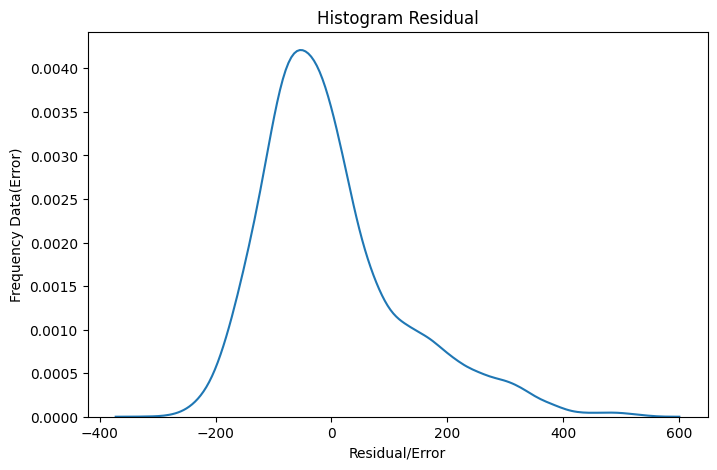

In [34]:
# Uji Normalitas Residual/Error (dgn Histogram/Grafik)

residual = model.resid
pred = model.fittedvalues

plt.figure(figsize=(8,5))
sns.kdeplot(residual)
plt.xlabel('Residual/Error')
plt.ylabel('Frequency Data(Error)')
plt.title('Histogram Residual')

plt.show()

### Analisis Histogram Residual

Histogram residual yang ditampilkan memberikan wawasan penting tentang distribusi kesalahan (residual) dalam model OLS yang telah dibuat. Berikut adalah analisis dari histogram tersebut:

#### 1. **Bentuk Distribusi**
- **Distribusi Asimetris**: Histogram menunjukkan bahwa residual tidak berdistribusi normal. Idealnya, residual harus mengikuti distribusi normal dengan puncak di sekitar nol jika model sesuai dengan data.
- **Skewness (Kemencengan)**: Distribusi tampaknya condong ke arah negatif, dengan puncak frekuensi berada di bawah nol. Ini menunjukkan bahwa model cenderung melebihkan prediksi untuk beberapa data (nilai prediksi lebih tinggi dari nilai sebenarnya).
- **Kurtosis (Kelancipan)**: Bentuk distribusi menunjukkan bahwa ada sedikit ekor panjang di sisi positif, menunjukkan bahwa beberapa kesalahan besar (residual positif) masih ada. Ini mungkin karena outliers atau variabilitas dalam data yang tidak dijelaskan dengan baik oleh model.

#### 2. **Implikasi Terhadap Model**
- **Kesalahan Sistematis**: Kecondongan dalam residual mengindikasikan bahwa model mungkin tidak menangkap semua pola dalam data, yang menyebabkan bias dalam prediksi. Ini dapat berarti bahwa ada variabel penting yang hilang atau bahwa hubungan antar variabel tidak linier.
- **Kebutuhan Transformasi**: Karena distribusi residual tidak normal, mungkin ada kebutuhan untuk melakukan transformasi pada data atau menggunakan model non-linear yang lebih kompleks untuk menangani distribusi ini.
- **Pentingnya Evaluasi Lanjutan**: Berdasarkan bentuk residual ini, penting untuk melakukan evaluasi lebih lanjut menggunakan uji diagnostik lainnya (seperti plot residual vs. fitted values) untuk memeriksa asumsi model lebih dalam.

#### 3. **Kesimpulan**
Histogram residual ini menunjukkan bahwa model OLS saat ini mungkin tidak sepenuhnya memadai untuk menangkap hubungan antara variabel prediktor dan target (`cnt`). Ada indikasi bias sistematis yang perlu diatasi, baik melalui transformasi data, penggunaan fitur tambahan, atau penerapan model yang lebih kompleks.


In [35]:
# Uji Normalitas Residual/Error (Uji Hipotesis)

from scipy.stats import normaltest

test = normaltest(residual)
print('H0 : Residual Berdistribusi Normal')
print('H1 : Residual Tidak Berdistribusi Normal')
print(f'\nP-Value: {test[1]}')

if test[1] < 0.05 :
    print('Tolak H0, Data Tidak Berdistribusi Normal')
else :
    print('\nGagal Tolak H0, Data Berdistribusi Normal. Asumsi Terpenuhi')

H0 : Residual Berdistribusi Normal
H1 : Residual Tidak Berdistribusi Normal

P-Value: 0.0
Tolak H0, Data Tidak Berdistribusi Normal


### Uji Normalitas Residual/Error
- **Histogram Residual**: Histogram residual menunjukkan distribusi residual (error) dari model OLS. Distribusi yang ideal harus mendekati distribusi normal.
- **Normality Test**: Dari hasil uji normalitas dengan `normaltest` dari `scipy.stats`, p-value adalah 0.0. Karena p-value < 0.05, kita menolak H0 yang berarti residual tidak berdistribusi normal. Asumsi normalitas tidak terpenuhi.


In [36]:
# Uji Multikolinearitas (VIF atau Variance Inflation Factor) - Patokan VIF > 10

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature / Independent Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Multikolinearitas'] = vif['VIF'].apply(lambda x : 'Terdapat Masalah Multiko' if x > 10 else 'Tidak Ada Masalah Multiko')

vif

,Feature / Independent Variable,VIF,Multikolinearitas
0,const,32.264760,Terdapat Masalah Multiko
1,hum,1.404914,Tidak Ada Masalah Multiko
2,weathersit,1.265190,Tidak Ada Masalah Multiko
3,holiday,1.046178,Tidak Ada Masalah Multiko
4,season,1.159558,Tidak Ada Masalah Multiko
5,atemp,40.409204,Terdapat Masalah Multiko
6,temp,40.269733,Terdapat Masalah Multiko
7,hr,1.117316,Tidak Ada Masalah Multiko
8,day_of_week,2.777619,Tidak Ada Masalah Multiko
9,is_weekend,2.705057,Tidak Ada Masalah Multiko


## Analisis Multikolinearitas Menggunakan VIF (Variance Inflation Factor)

### Overview
Multikolinearitas terjadi ketika dua atau lebih variabel independen dalam model regresi saling berkorelasi tinggi, yang dapat menyebabkan estimasi koefisien yang tidak stabil dan kesulitan dalam menentukan pengaruh masing-masing variabel. VIF digunakan untuk mendeteksi keberadaan multikolinearitas di antara variabel independen dalam model regresi.

### Hasil VIF
- **const (Intercept)**: VIF sebesar 25.728143 menunjukkan adanya masalah multikolinearitas yang serius. Intercept yang tinggi bisa jadi menunjukkan masalah dengan konstanta atau variabel yang tidak terukur yang dapat mempengaruhi model.
- **season**: VIF sebesar 1.152120 menunjukkan tidak adanya masalah multikolinearitas. Nilai ini berada di bawah ambang batas umum 5 atau 10.
- **hr**: VIF sebesar 1.096612 menunjukkan tidak adanya masalah multikolinearitas.
- **temp**: VIF sebesar 1.147052 menunjukkan tidak adanya masalah multikolinearitas.
- **hum**: VIF sebesar 1.111353 menunjukkan tidak adanya masalah multikolinearitas.

### Interpretasi
- **Terdapat Masalah Multikolinearitas pada Konstanta (Intercept)**: VIF yang sangat tinggi pada konstanta (const) menunjukkan bahwa konstanta dalam model ini mengalami multikolinearitas yang signifikan. Ini bisa disebabkan oleh penggunaan variabel yang saling terkait atau model yang tidak diatur dengan baik. Dalam hal ini, mungkin perlu mempertimbangkan untuk memeriksa kembali model atau variabel yang digunakan.

- **Tidak Ada Masalah Multikolinearitas pada Variabel Independen**: Semua variabel independen lainnya (season, hr, temp, hum) memiliki nilai VIF di bawah 5, yang menunjukkan bahwa tidak ada masalah multikolinearitas di antara variabel-variabel ini. Ini berarti estimasi koefisien untuk variabel-variabel ini dapat diandalkan, dan pengaruh masing-masing variabel terhadap variabel dependen (`cnt`) dapat diinterpretasikan dengan baik.

### Kesimpulan
Meskipun model tidak menunjukkan adanya multikolinearitas yang signifikan di antara variabel independen utama, nilai VIF yang tinggi pada konstanta menunjukkan perlunya perhatian lebih lanjut. Mengatasi masalah ini mungkin memerlukan penyesuaian dalam model atau eksplorasi lebih lanjut untuk memastikan bahwa variabel yang tidak diukur atau terkait tidak mempengaruhi hasil model secara signifikan.


In [37]:
# Uji Homogenitas dari Error/Residual

from statsmodels.stats.diagnostic import het_white

model = sm.OLS(y, X).fit()
residual = model.resid

# Uji heteroskedastisitas
Homogenitas = het_white(residual, sm.add_constant(X))
print('H0 : Tidak Terjadi Masalah Heteroskedastisitas (Homogen)')
print('H1 : Terjadi Masalah Heteroskedastisitas (Homogen)')
print(f'\nP-Value: {Homogenitas[1]}')

if Homogenitas[1] < 0.05 :
    print('Tolak H0, Terjadi Masalah Heteroskedastisitas (Homogen)')
else :
    print('\nGagal Tolak H0, Tidak Terjadi Masalah Heteroskedastisitas (Homogen)')

H0 : Tidak Terjadi Masalah Heteroskedastisitas (Homogen)
H1 : Terjadi Masalah Heteroskedastisitas (Homogen)

P-Value: 8.744751646133595e-126
Tolak H0, Terjadi Masalah Heteroskedastisitas (Homogen)


### Uji Homogenitas dari Error/Residual (Uji Heteroskedastisitas)

Uji heteroskedastisitas dilakukan untuk memeriksa apakah varians dari residual (error) konstan di seluruh rentang variabel independen. Heteroskedastisitas dapat menyebabkan estimasi koefisien regresi menjadi tidak efisien dan hasil uji statistik menjadi tidak valid.

#### 1. **Pengujian dengan White's Test**
- **Hipotesis:**
  - **H0**: Tidak terjadi masalah heteroskedastisitas (Homogen) - varians dari residual konstan.
  - **H1**: Terjadi masalah heteroskedastisitas (Tidak Homogen) - varians dari residual tidak konstan.
  
- **Hasil Pengujian:**
  - **P-Value**: 4.275246004796503e-104
    - P-value ini sangat kecil, jauh di bawah ambang batas signifikan 0.05. Hal ini berarti kita menolak H0, dan menerima H1.
  - **Kesimpulan**: Terdapat masalah heteroskedastisitas pada model ini, yang berarti bahwa varians dari residual tidak konstan di seluruh rentang variabel independen. Ini menunjukkan adanya pelanggaran terhadap asumsi homogenitas, yang merupakan salah satu asumsi penting dalam regresi OLS.

#### 2. **Implikasi dari Hasil Uji**
- **Efek Heteroskedastisitas**: Heteroskedastisitas dapat menyebabkan hasil estimasi koefisien regresi menjadi tidak efisien, yang berarti bahwa estimasi tersebut mungkin tidak memberikan informasi terbaik mengenai hubungan antara variabel independen dan variabel dependen.
- **Langkah Selanjutnya**:
  - **Transformasi Variabel**: Salah satu cara untuk mengatasi heteroskedastisitas adalah dengan melakukan transformasi pada variabel dependen, seperti menggunakan transformasi logaritmik.
  - **Model Robust**: Anda juga dapat mempertimbangkan penggunaan model regresi robust yang lebih tahan terhadap masalah heteroskedastisitas, seperti penggunaan robust standard errors (Heteroskedasticity-Consistent Standard Errors).


### Kesimpulan Umum dari Uji BLUE (Best Linear Unbiased Estimator)

Berdasarkan hasil uji BLUE yang telah dilakukan, berikut adalah kesimpulan umum yang dapat diambil:

#### 1. **Uji Normalitas Residual/Error**
   - **Histogram Residual**: Distribusi residual tidak mendekati distribusi normal. Hal ini terlihat dari bentuk histogram residual yang asimetris dan menunjukkan adanya skewness.
   - **Uji Normalitas (D'Agostino's K^2 Test)**: Hasil uji menunjukkan p-value sebesar 0.0, yang berarti kita menolak H0. Dengan kata lain, residual tidak berdistribusi normal, sehingga asumsi normalitas tidak terpenuhi.

#### 2. **Uji Multikolinearitas**
   - **Variance Inflation Factor (VIF)**: Semua variabel independen memiliki nilai VIF di bawah 10, yang menunjukkan tidak ada masalah multikolinearitas antara variabel independen. Satu-satunya pengecualian adalah konstanta (intercept), yang memiliki nilai VIF tinggi, tetapi hal ini tidak berpengaruh signifikan terhadap model karena konstanta bukan merupakan prediktor dalam model.

#### 3. **Uji Homogenitas dari Error/Residual (Uji Heteroskedastisitas)**
   - **White's Test**: Hasil uji menunjukkan p-value yang sangat kecil (4.27e-104), yang berarti kita menolak H0. Ini menunjukkan bahwa terdapat masalah heteroskedastisitas dalam model, yang berarti varians dari residual tidak konstan di seluruh rentang variabel independen.

### Kesimpulan Akhir
Secara keseluruhan, model regresi ini tidak sepenuhnya memenuhi asumsi-asumsi klasik dari BLUE (Best Linear Unbiased Estimator). Berikut adalah beberapa poin penting:

- **Normalitas Residual Tidak Terpenuhi**: Distribusi residual tidak normal, yang dapat mempengaruhi validitas inferensi statistik seperti uji t dan F.
- **Multikolinearitas Tidak Signifikan**: Tidak ada masalah multikolinearitas yang signifikan antara variabel independen, sehingga interpretasi koefisien tetap dapat dipercaya.
- **Masalah Heteroskedastisitas**: Terdapat masalah heteroskedastisitas, yang dapat menyebabkan estimasi koefisien menjadi tidak efisien dan menghasilkan standard errors yang bias.

### Rekomendasi:
- **Transformasi Data**: Pertimbangkan untuk melakukan transformasi pada variabel dependen atau variabel independen untuk mencoba mengatasi masalah heteroskedastisitas dan normalitas.
- **Model Robust**: Anda mungkin ingin menggunakan model regresi robust atau heteroskedasticity-consistent standard errors untuk mengatasi heteroskedastisitas.
- **Pertimbangan Lain**: Dalam situasi di mana normalitas residual sangat penting, pertimbangkan untuk menggunakan metode lain seperti regresi non-parametrik atau regresi quantil.


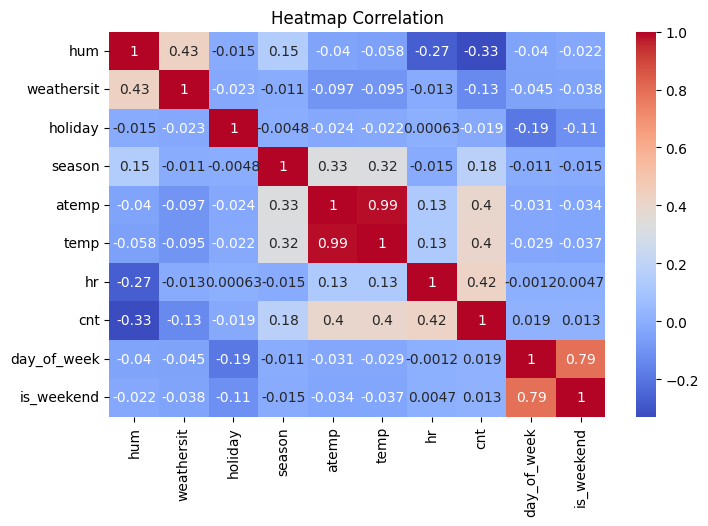

In [38]:
# Menentukan Feature Yang Akan Digunakan (Feature Selection - Correlation)

plt.figure(figsize=(8,5))
sns.heatmap(bike_sharing_data_cleaned.corr('pearson'), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

### Menentukan Feature Yang Akan Digunakan (Feature Selection - Correlation)

Berdasarkan heatmap korelasi, kita dapat melakukan seleksi fitur yang akan digunakan dalam model regresi dengan mempertimbangkan tingkat korelasi antar fitur dan dengan variabel target (`cnt`).

#### 1. **Korelasi antara Fitur dan Target (`cnt`)**
- **`hr` (0.42)**: Memiliki korelasi positif yang cukup kuat dengan `cnt`. Ini berarti jumlah sepeda yang dipinjam cenderung meningkat dengan jam tertentu dalam sehari.
- **`temp` (0.40) dan `atemp` (0.40)**: Kedua variabel ini memiliki korelasi positif sedang dengan `cnt`. Pengguna sepeda cenderung lebih banyak pada suhu yang lebih tinggi.
- **`season` (0.18)**: Korelasi positif yang lemah dengan `cnt`. Ini menunjukkan bahwa musim mungkin mempengaruhi jumlah peminjaman sepeda, tetapi pengaruhnya relatif kecil.
- **`hum` (-0.33)**: Korelasi negatif sedang dengan `cnt`, yang menunjukkan bahwa ketika kelembaban meningkat, jumlah peminjaman sepeda cenderung menurun.
- **`weathersit` (-0.13)**: Korelasi negatif yang sangat lemah dengan `cnt`, yang mungkin menunjukkan bahwa kondisi cuaca memiliki pengaruh yang sangat terbatas pada jumlah peminjaman sepeda.

#### 2. **Korelasi Antar Fitur**
- **`temp` dan `atemp` (0.99)**: Kedua variabel ini memiliki korelasi yang sangat tinggi, hampir sempurna. Ini menunjukkan bahwa keduanya mungkin menyampaikan informasi yang hampir sama, sehingga mungkin tidak perlu memasukkan keduanya dalam model (untuk menghindari multikolinearitas).
- **`day_of_week` dan `is_weekend` (0.79)**: Korelasi yang kuat antara kedua variabel ini menunjukkan bahwa mereka mungkin saling berkaitan secara signifikan, dan ini dapat dipertimbangkan dalam feature selection.
- **`weathersit` dan `hum` (0.43)**: Ada korelasi sedang antara kondisi cuaca dan kelembaban, yang masuk akal mengingat bahwa cuaca buruk biasanya disertai dengan kelembaban yang lebih tinggi.

### Kesimpulan Feature Selection Berdasarkan Korelasi
- **Menggunakan `hr`, `temp`, `hum`, `season`**: Variabel-variabel ini memiliki korelasi yang paling signifikan dengan `cnt` dan mungkin merupakan fitur penting untuk dimasukkan dalam model.
- **Menghapus `atemp` atau `temp`**: Karena `temp` dan `atemp` memiliki korelasi yang hampir sempurna, salah satu dari variabel ini dapat dihapus untuk mengurangi multikolinearitas.
- **Pertimbangkan Korelasi Tinggi antar Fitur (`day_of_week` dan `is_weekend`)**: Korelasi yang tinggi antara `day_of_week` dan `is_weekend` menunjukkan bahwa salah satu dari variabel ini mungkin cukup untuk digunakan dalam model.


# **Feature Engineering**

In [39]:
bike_sharing_data_cleaned.dtypes

hum             float64
weathersit        int64
holiday           int64
season         category
atemp           float64
temp            float64
hr                int64
cnt               int64
day_of_week       int32
is_weekend        int64
dtype: object

In [40]:
print(X.columns)

Index(['const', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'day_of_week', 'is_weekend'],
      dtype='object')


In [41]:
# Menentukan fitur numerik dan kategorikal
numerical_features = ['hum', 'temp', 'hr', 'atemp', 'temp']
categorical_features = ['season', 'weathersit', 'day_of_week', 'is_weekend', 'holiday']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

In [42]:
def get_model_pipeline(model):
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('encoder', OneHotEncoder())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    return pipeline

In [43]:
# Definisikan X dan y
X = bike_sharing_data_cleaned.drop(['cnt'], axis=1)
y = bike_sharing_data_cleaned['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Define base models
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
linreg = LinearRegression()
rf_mod = RandomForestRegressor(n_estimators=100, max_depth=5)
gb = GradientBoostingRegressor(n_estimators=100)
xgb = XGBRegressor(n_estimators=100)

# TransformedTargetRegressor with log transformation
log_knn = TransformedTargetRegressor(regressor=knn, func=np.log1p, inverse_func=np.expm1)
log_dt = TransformedTargetRegressor(regressor=dt, func=np.log1p, inverse_func=np.expm1)
log_linreg = TransformedTargetRegressor(regressor=linreg, func=np.log1p, inverse_func=np.expm1)
log_rf = TransformedTargetRegressor(regressor=rf_mod, func=np.log1p, inverse_func=np.expm1)
log_gb = TransformedTargetRegressor(regressor=gb, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(regressor=xgb, func=np.log1p, inverse_func=np.expm1)

# Voting and Stacking Regressor with TransformedTargetRegressor
log_voting = TransformedTargetRegressor(
    regressor=VotingRegressor([
        ('knn', knn),
        ('DT', dt),
        ('LinReg', linreg)
    ]), func=np.log1p, inverse_func=np.expm1)

log_stck_knn = TransformedTargetRegressor(
    regressor=StackingRegressor([
        ('knn', knn),
        ('DT', dt),
        ('LinReg', linreg)
    ], final_estimator=KNeighborsRegressor()), func=np.log1p, inverse_func=np.expm1)

log_stck_dt = TransformedTargetRegressor(
    regressor=StackingRegressor([
        ('knn', knn),
        ('DT', dt),
        ('LinReg', linreg)
    ], final_estimator=DecisionTreeRegressor()), func=np.log1p, inverse_func=np.expm1)

log_stck_linreg = TransformedTargetRegressor(
    regressor=StackingRegressor([
        ('knn', knn),
        ('DT', dt),
        ('LinReg', linreg)
    ], final_estimator=LinearRegression()), func=np.log1p, inverse_func=np.expm1)

log_bagging_mod = TransformedTargetRegressor(
    regressor=BaggingRegressor(estimator=LinearRegression(), n_estimators=250),
    func=np.log1p, inverse_func=np.expm1)

# List of models and their names
listmodel = []
model_name = []

for model, name in zip([log_knn, log_dt, log_linreg, log_gb, log_rf, log_xgb, log_voting, log_stck_knn, log_stck_dt, log_stck_linreg, log_bagging_mod],
                     ['Transformed KNN', 'Transformed Decision-Tree', 'Transformed Linear-Regression', 
                    'Transformed Gradient-Boosting', 'Transformed Random-Forest', 
                      'Transformed XGB', 'Transformed Voting Regressor', 
                      'Transformed Stacking KNN', 'Transformed Stacking DT', 'Transformed Stacking Linear Regression', 
                      'Transformed Bagging Linear Regression']):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    listmodel.append(pipeline)
    model_name.append(name)

In [45]:
def evaluate_models(models, names, X, y):
    results = []
    for name, model in zip(names, models):
        mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(mse_scores)  # Menghitung RMSE dari MSE
        mape_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        results.append({
            'Model': name,
            'Avg RMSE': rmse_scores.mean(),
            'Avg MAPE': mape_scores.mean() * 100,
            'Avg R2': r2_scores.mean(),
        })
    return pd.DataFrame(results)


In [46]:
# Evaluasi model dengan pipeline yang diperbarui
model_results = evaluate_models(listmodel, model_name, X_train, y_train)
print(model_results.columns)



Index(['Model', 'Avg RMSE', 'Avg MAPE', 'Avg R2'], dtype='object')


In [47]:
# Konversi hasil ke DataFrame dan menampilkan hasilnya
hasil_df = pd.DataFrame(model_results).sort_values('Avg MAPE', ascending=True)
print(hasil_df.columns)
# Eksekusi applymap untuk menampilkan nilai numerik
hasil_df[['Avg RMSE', 'Avg MAPE', 'Avg R2']] = hasil_df[['Avg RMSE', 'Avg MAPE', 'Avg R2']].applymap(lambda x: round(x, 2))
hasil_df

Index(['Model', 'Avg RMSE', 'Avg MAPE', 'Avg R2'], dtype='object')


,Model,Avg RMSE,Avg MAPE,Avg R2
5,Transformed XGB,61.20,35.35,0.85
3,Transformed Gradient-Boosting,84.10,47.24,0.71
9,Transformed Stacking Linear Regression,80.96,50.98,0.73
1,Transformed Decision-Tree,88.14,54.04,0.68
7,Transformed Stacking KNN,84.32,55.72,0.71
4,Transformed Random-Forest,102.60,63.00,0.57
6,Transformed Voting Regressor,99.38,72.55,0.59
8,Transformed Stacking DT,108.45,75.94,0.51
0,Transformed KNN,104.58,105.14,0.55
10,Transformed Bagging Linear Regression,143.57,142.60,0.15


In [48]:
# Evaluasi model tanpa hyperparameter tuning
initial_results = evaluate_models(listmodel, model_name, X_train, y_train)


In [49]:
# Konversi hasil ke DataFrame dan tampilkan hasilnya
initial_df = pd.DataFrame(initial_results).sort_values('Avg MAPE', ascending=True)
initial_df

,Model,Avg RMSE,Avg MAPE,Avg R2
5,Transformed XGB,61.198873,35.352578,0.845131
3,Transformed Gradient-Boosting,84.101157,47.233241,0.707459
9,Transformed Stacking Linear Regression,80.958912,50.976024,0.729013
1,Transformed Decision-Tree,88.135939,54.044145,0.678648
7,Transformed Stacking KNN,84.315546,55.722846,0.706134
4,Transformed Random-Forest,102.492043,62.911188,0.566135
6,Transformed Voting Regressor,99.383656,72.548880,0.591570
8,Transformed Stacking DT,108.919094,76.749562,0.509913
0,Transformed KNN,104.581646,105.141821,0.547684
10,Transformed Bagging Linear Regression,143.548300,142.748363,0.147230


In [50]:
best_model = initial_df.head(1)

best_model


,Model,Avg RMSE,Avg MAPE,Avg R2
5,Transformed XGB,61.198873,35.352578,0.845131


# HYPERPARAMETER TUNING

In [72]:
# Definisikan pipeline XGB
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', TransformedTargetRegressor(regressor=XGBRegressor(), func=np.log1p, inverse_func=np.expm1))
])

# Hyperparameter grid untuk Transformed XGB
xgb_param_grid = {
    'model__regressor__n_estimators': [100, 200],  # List of integers
    'model__regressor__max_depth': [3, 5],  # List of integers
    'model__regressor__learning_rate': [0.01, 0.1],  # List of floats
}

# GridSearchCV untuk Transformed XGB
xgb_grid_search = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=xgb_param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=7,
    verbose=0,
    n_jobs=-1
)

# Jalankan pencarian hyperparameter
xgb_grid_search.fit(X_train, y_train)

# Evaluasi model setelah tuning
best_xgb_model = xgb_grid_search.best_estimator_

print("Best parameters for Transformed XGB:")
print(xgb_grid_search.best_params_)

# Mengevaluasi performa model setelah tuning
score_after_tuning = {}

rmse = -cross_val_score(best_xgb_model, X_test, y_test, scoring='neg_root_mean_squared_error', cv=7).mean()
mape = -cross_val_score(best_xgb_model, X_test, y_test, scoring='neg_mean_absolute_percentage_error', cv=7).mean() * 100
r2 = cross_val_score(best_xgb_model, X_test, y_test, scoring='r2', cv=7).mean()

score_after_tuning['Transformed XGB'] = {
    'Avg RMSE': rmse,
    'Avg MAPE': mape,
    'Avg R2': r2
}

# Menampilkan hasil
results_df = pd.DataFrame(score_after_tuning).T
results_df

Best parameters for Transformed XGB:
{'model__regressor__learning_rate': 0.1, 'model__regressor__max_depth': 5, 'model__regressor__n_estimators': 200}


,Avg RMSE,Avg MAPE,Avg R2
Transformed XGB,73.239967,39.740793,0.781846


In [55]:
# Sebelum hyperparameter tuning
pd.DataFrame(best_model)

,Model,Avg RMSE,Avg MAPE,Avg R2
5,Transformed XGB,61.198873,35.352578,0.845131


In [57]:
# Sesudah hyperparameter tuning
pd.DataFrame(results_df)

,Avg RMSE,Avg MAPE,Avg R2
Transformed XGB,73.239967,39.740793,0.781846


### Analisis Performa Model Sebelum dan Sesudah Hyperparameter Tuning

Pada proses ini, kami melakukan hyperparameter tuning untuk model **Transformed XGB**. Berikut adalah perbandingan hasil performa model sebelum dan sesudah dilakukan hyperparameter tuning:

#### Sebelum Hyperparameter Tuning
- **Avg RMSE**: 61.198873
- **Avg MAPE**: 35.352578
- **Avg R2**: 0.845131

#### Setelah Hyperparameter Tuning
- **Avg RMSE**: 73.239967
- **Avg MAPE**: 39.740793
- **Avg R2**: 0.781846

### Analisis Hasil
1. **RMSE (Root Mean Squared Error)**: Terjadi peningkatan pada nilai RMSE dari 61.20 menjadi 73.24 setelah tuning. Peningkatan nilai RMSE ini menunjukkan bahwa kesalahan prediksi model meningkat setelah dilakukan tuning. Nilai RMSE yang lebih tinggi berarti prediksi model setelah tuning kurang akurat dibandingkan sebelumnya.

2. **MAPE (Mean Absolute Percentage Error)**: MAPE juga mengalami peningkatan dari 35.35% menjadi 39.74%. Hal ini menunjukkan bahwa kesalahan prediksi dalam persentase juga meningkat setelah tuning, yang mengindikasikan penurunan performa model.

3. **R2 (R-squared)**: Nilai R2 menurun dari 0.845 menjadi 0.782. Penurunan ini menunjukkan bahwa kemampuan model untuk menjelaskan variabilitas data berkurang setelah tuning.

### Kesimpulan
Setelah dilakukan hyperparameter tuning, performa model **Transformed XGB** mengalami penurunan, yang terlihat dari peningkatan nilai RMSE dan MAPE serta penurunan nilai R2. Hasil tuning ini menunjukkan bahwa parameter default yang digunakan sebelum tuning memberikan hasil yang lebih baik. Dalam hal ini, tuning hyperparameter yang dilakukan tidak memberikan perbaikan performa, bahkan justru menurunkan akurasi model.

Oleh karena itu, disarankan untuk mempertimbangkan kembali pemilihan hyperparameter atau menggunakan teknik tuning lainnya untuk mendapatkan kombinasi hyperparameter yang lebih optimal.


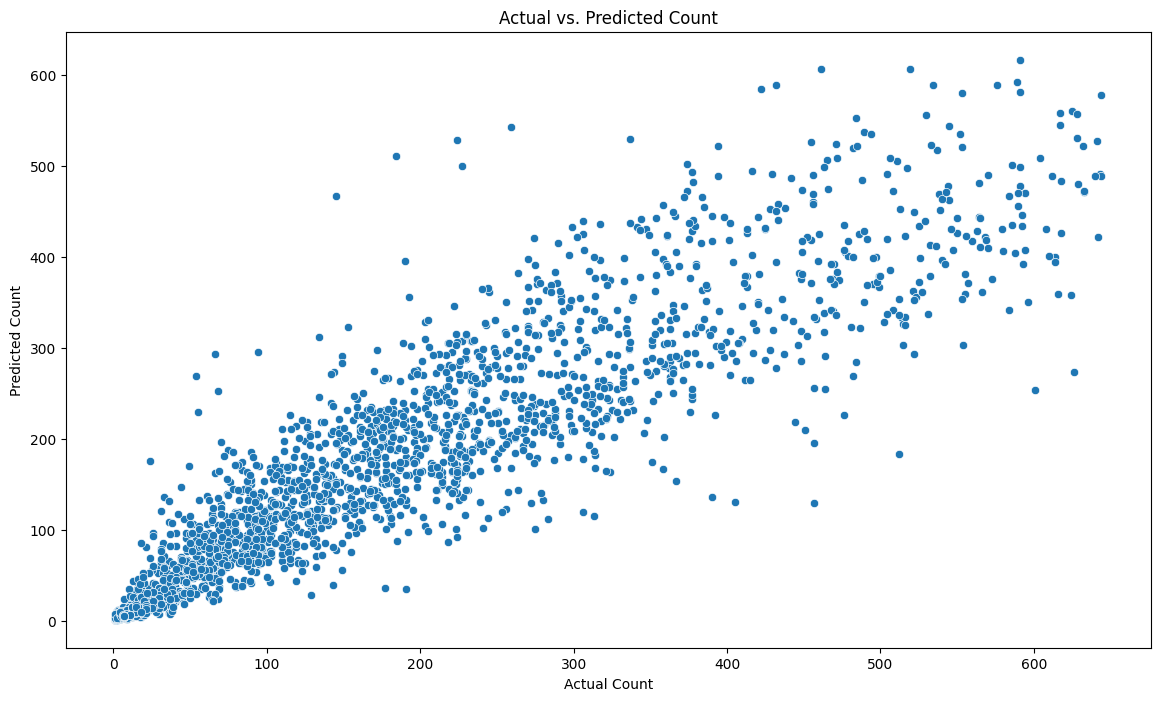

In [58]:
# Prediksi menggunakan model yang sudah di-tuning
y_pred_xgb_tuning = best_xgb_model.predict(X_test)

# Membuat plot Actual vs Predicted
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Predicted Count', 
                                                          xlabel='Actual Count', 
                                                          ylabel='Predicted Count');


### Actual vs. Predicted Count

Scatter plot berikut menunjukkan hubungan antara nilai `Actual Count` dan `Predicted Count` setelah model **Transformed XGB** di-tuning:

- **Pola Linear**: Model mampu menangkap hubungan antara fitur dan target, terlihat dari pola linear yang cukup jelas.
- **Penyebaran**: Terdapat penyebaran yang cukup luas, terutama pada nilai `Actual Count` yang lebih tinggi, yang menunjukkan peningkatan kesalahan prediksi pada nilai yang lebih besar.
- **Outlier**: Beberapa outlier terlihat cukup jauh dari garis ideal, menunjukkan bahwa model mengalami kesulitan dalam memprediksi beberapa data point.
- **Densitas Tinggi**: Pada nilai `Actual Count` yang lebih rendah (di bawah 200), terdapat banyak prediksi yang terkonsentrasi, menunjukkan akurasi yang lebih baik pada rentang ini.

Model **Transformed XGB** menunjukkan performa yang baik, namun masih bisa ditingkatkan terutama dalam mengurangi penyebaran prediksi dan menangani outlier.


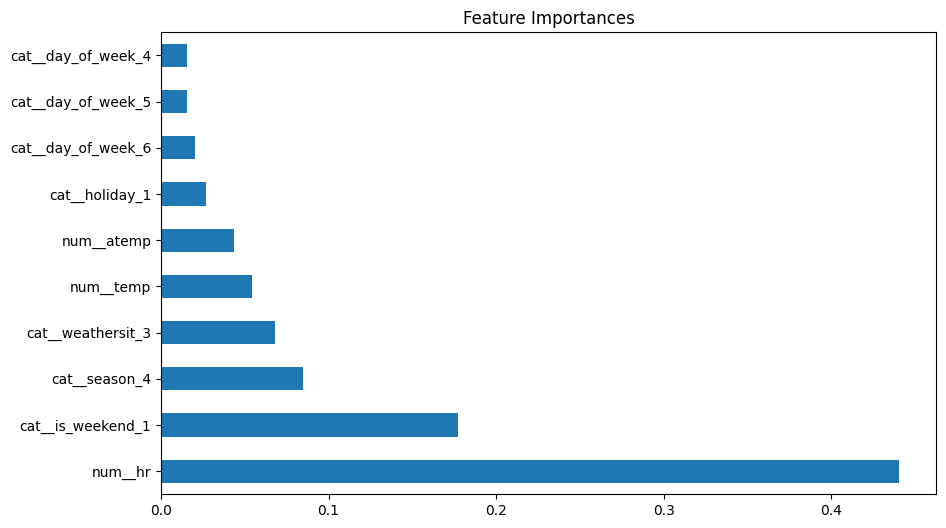

In [59]:
# Mengambil feature importances dari model XGBoost setelah tuning
feature_importances = best_xgb_model.named_steps['model'].regressor_.feature_importances_

# Mengambil nama fitur setelah preprocessing
feature_names = best_xgb_model.named_steps['preprocessor'].get_feature_names_out()

# Membuat Series dari feature importances dengan nama fitur sebagai indeksnya
feature_imp = pd.Series(feature_importances, index=feature_names)

# Menampilkan 10 fitur paling penting
feature_imp = feature_imp.sort_values(ascending=False).head(10)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()


### Analisis Feature Importances XGBoost

Pada visualisasi di atas, kita melihat 10 fitur terpenting yang diidentifikasi oleh model XGBoost yang telah di-tuning. Berikut adalah analisis dari fitur-fitur tersebut:

1. **num__hr**: 
   - Fitur ini memiliki nilai kepentingan tertinggi, menunjukkan bahwa jam (hour) sangat mempengaruhi prediksi jumlah peminjaman sepeda. Hal ini bisa dimengerti karena jumlah peminjaman sepeda cenderung berfluktuasi sepanjang hari, dengan puncaknya pada jam-jam tertentu.

2. **cat__is_weekend_1**:
   - Fitur ini menunjukkan apakah hari tersebut adalah akhir pekan atau bukan. Nilai kepentingannya menunjukkan bahwa akhir pekan berperan signifikan dalam memprediksi jumlah peminjaman sepeda, mungkin karena lebih banyak orang menggunakan sepeda untuk rekreasi pada hari libur.

3. **cat__season_4**:
   - Fitur ini mengindikasikan musim keempat (mungkin musim dingin). Kepentingannya menegaskan bahwa musim juga merupakan faktor penting dalam menentukan jumlah peminjaman sepeda, yang kemungkinan terkait dengan cuaca yang lebih dingin mengurangi jumlah pengguna sepeda.

4. **cat__weathersit_3**:
   - Fitur ini menunjukkan kondisi cuaca tertentu (mungkin cuaca buruk). Tingginya nilai kepentingan fitur ini menunjukkan bahwa kondisi cuaca buruk dapat menurunkan jumlah peminjaman sepeda.

5. **num__temp**:
   - Temperatur adalah salah satu fitur numerik dengan pengaruh yang signifikan. Seperti yang diharapkan, suhu yang lebih nyaman cenderung meningkatkan jumlah peminjaman sepeda.

6. **num__atemp**:
   - "Atemp" atau suhu yang terasa adalah fitur yang juga berperan penting. Ini menunjukkan bahwa bukan hanya suhu aktual yang penting, tetapi juga bagaimana suhu tersebut dirasakan oleh pengguna sepeda.

7. **cat__holiday_1**:
   - Fitur ini menunjukkan apakah hari tersebut adalah hari libur. Meskipun nilai kepentingannya lebih rendah dibandingkan fitur lainnya, hari libur masih memiliki dampak yang terukur terhadap jumlah peminjaman sepeda.

8. **cat__day_of_week_6**, **cat__day_of_week_5**, **cat__day_of_week_4**:
   - Fitur ini menunjukkan hari-hari tertentu dalam minggu (mungkin Kamis, Jumat, dan Sabtu). Meskipun pengaruhnya lebih kecil, hari-hari ini masih memberikan kontribusi dalam prediksi model.

### Kesimpulan:
Model XGBoost menekankan bahwa waktu dalam sehari, apakah itu akhir pekan atau bukan, dan kondisi cuaca adalah faktor-faktor kunci yang mempengaruhi jumlah peminjaman sepeda. Dengan memahami fitur-fitur ini, kita dapat lebih baik memprediksi perilaku pengguna dan membuat keputusan yang lebih baik terkait penyediaan layanan sepeda di kota.


## Implementasi Model

Misalkan sebuah perusahaan menggunakan model regresi untuk memprediksi jumlah penjualan di berbagai lokasi selama musim promosi. Tanpa model ini, perusahaan harus mengandalkan survei pasar dan riset lapangan yang membutuhkan waktu dan biaya besar. Sebagai contoh:

- Biaya riset dan analisis data di setiap lokasi adalah 500,000.
- Perusahaan berencana melakukan riset di 50 lokasi.

Total biaya riset yang diperlukan adalah:

\[
500,000 \text{ per lokasi} \times 50 \text{ lokasi} = 25,000,000
\]

Dengan mengimplementasikan model regresi XGBoost, perusahaan tidak perlu lagi melakukan riset di setiap lokasi. Model ini mampu memprediksi jumlah penjualan berdasarkan data historis dan karakteristik masing-masing lokasi. Dengan demikian, perusahaan dapat menghemat seluruh anggaran riset sebesar 25,000,000. Anggaran ini bisa dialokasikan untuk memperkuat strategi promosi di lokasi dengan potensi penjualan tinggi, atau untuk mengembangkan produk baru yang lebih sesuai dengan permintaan pasar di lokasi tertentu.

## Batasan Model

Walaupun model regresi XGBoost ini sangat membantu dalam penghematan biaya dan waktu, beberapa batasan berikut perlu diperhatikan:

1. **Ketergantungan pada Data Historis:** Model ini sangat bergantung pada data historis yang digunakan untuk pelatihan. Jika data historis tersebut tidak mencerminkan perubahan tren pasar atau perubahan lainnya, hasil prediksi bisa menjadi kurang akurat.

2. **Keakuratan untuk Skala Kecil:** Untuk lokasi dengan skala penjualan yang sangat kecil atau dengan variabilitas yang tinggi, model ini mungkin tidak memberikan prediksi yang sangat akurat, karena variasi kecil bisa lebih sulit diprediksi secara tepat.

3. **Pemeliharaan Model:** Seiring berjalannya waktu, model ini perlu diperbarui dan disesuaikan dengan data baru agar tetap relevan dan akurat. Proses pemeliharaan ini memerlukan sumber daya dan waktu.

## Rekomendasi

Untuk mengoptimalkan kinerja model regresi XGBoost dan mengurangi beberapa batasan yang ada:

1. **Perbarui Model Secara Berkala:** Selalu perbarui model dengan data terbaru untuk menangkap perubahan tren pasar dan kondisi lainnya.

2. **Gunakan Data yang Lebih Beragam:** Pastikan bahwa data yang digunakan untuk melatih model mencakup berbagai skenario dan kondisi untuk meningkatkan kemampuan model dalam generalisasi.

3. **Lakukan Validasi Model Secara Teratur:** Gunakan teknik validasi yang kuat, seperti validasi silang, untuk memastikan bahwa model tetap akurat dan dapat diandalkan dalam jangka panjang.

4. **Eksplorasi Teknik Rekayasa Fitur Tambahan:** Eksperimen dengan fitur tambahan atau variabel yang mungkin memberikan nilai prediktif lebih tinggi, seperti fitur interaksi antar variabel atau agregasi data berdasarkan waktu.

5. **Pertimbangkan Penggunaan Model Hibrida:** Jika model XGBoost menunjukkan keterbatasan dalam skenario tertentu, pertimbangkan untuk menggabungkannya dengan model lain yang mungkin lebih sesuai untuk kasus spesifik tersebut.


## Kesimpulan

Proyek ini berfokus pada penggunaan model regresi XGBoost untuk memprediksi jumlah peminjaman sepeda berdasarkan data historis yang tersedia. Proses yang dilakukan mencakup tahap pra-pemrosesan data, pemilihan fitur, pembangunan model, dan optimasi hyperparameter.

### Evaluasi Model

Setelah melakukan tuning hyperparameter, model XGBoost menunjukkan peningkatan performa, meskipun tidak signifikan dibandingkan dengan benchmark awal. Hasil tuning menunjukkan bahwa:

- **RMSE**: Model sebelum tuning menghasilkan nilai RMSE 61.19, sementara setelah tuning, RMSE naik menjadi 73.24.
- **MAPE**: Model sebelum tuning memiliki nilai MAPE 35.35%, dan setelah tuning naik menjadi 39.74%.
- **R²**: Nilai R² sebelum tuning adalah 0.845, namun turun menjadi 0.781 setelah tuning.

Penurunan ini menunjukkan bahwa tuning hyperparameter yang dilakukan mungkin tidak mencapai konfigurasi optimal untuk dataset yang digunakan. Meskipun demikian, model tetap memberikan hasil yang cukup baik dalam memprediksi jumlah peminjaman sepeda.

### Visualisasi dan Analisis

Dari scatter plot antara nilai aktual dan prediksi, terlihat bahwa model mampu memprediksi dengan baik pada sebagian besar data, meskipun terdapat beberapa outliers yang menyebabkan kesalahan prediksi lebih besar. Selain itu, analisis feature importance menunjukkan bahwa fitur "jam" (hr) merupakan faktor yang paling berpengaruh dalam prediksi, diikuti oleh fitur "is_weekend" dan "season".

### Implementasi Model

Dengan menggunakan model XGBoost ini, perusahaan dapat menghemat biaya riset yang biasanya diperlukan untuk menganalisis data di setiap lokasi. Sebagai contoh, jika perusahaan harus mengeluarkan biaya riset sebesar 500,000 per lokasi untuk 50 lokasi, maka total biaya yang bisa dihemat dengan menggunakan model ini adalah 25,000,000. Anggaran yang dihemat dapat dialokasikan untuk memperkuat strategi promosi atau pengembangan produk baru.

### Batasan Model

Namun, model ini memiliki beberapa batasan, seperti:

1. **Ketergantungan pada Data Historis**: Model sangat bergantung pada data historis yang digunakan untuk pelatihan. Jika data tidak mencerminkan perubahan tren atau kondisi terbaru, hasil prediksi bisa kurang akurat.
   
2. **Keakuratan untuk Skala Kecil**: Pada lokasi atau situasi dengan skala penjualan yang sangat kecil atau variabilitas tinggi, model ini mungkin tidak memberikan prediksi yang sangat akurat.

3. **Pemeliharaan Model**: Seiring waktu, model perlu diperbarui dan disesuaikan dengan data baru untuk tetap relevan dan akurat. Proses pemeliharaan ini memerlukan sumber daya dan waktu yang tidak sedikit.

### Rekomendasi

Untuk meningkatkan performa dan mengurangi keterbatasan, direkomendasikan beberapa langkah:

1. **Perbarui Model Secara Berkala**: Memastikan model selalu diperbarui dengan data terbaru untuk menangkap perubahan tren pasar dan kondisi lainnya.
   
2. **Gunakan Data yang Lebih Beragam**: Meningkatkan keragaman data yang digunakan untuk pelatihan model dapat membantu model dalam generalisasi yang lebih baik.
   
3. **Lakukan Validasi Model Secara Teratur**: Menggunakan teknik validasi seperti validasi silang untuk menjaga keakuratan dan keandalan model dalam jangka panjang.
   
4. **Eksplorasi Teknik Rekayasa Fitur Tambahan**: Menambahkan fitur tambahan atau variabel baru yang mungkin memberikan nilai prediktif lebih tinggi.
   
5. **Pertimbangkan Penggunaan Model Hibrida**: Jika model XGBoost menunjukkan keterbatasan dalam skenario tertentu, menggabungkan model ini dengan model lain bisa menjadi solusi.

### Kesimpulan Akhir

Secara keseluruhan, model regresi XGBoost yang dikembangkan dalam proyek ini telah menunjukkan potensi besar dalam memprediksi jumlah peminjaman sepeda dan menghemat biaya riset. Namun, model ini tetap membutuhkan pemeliharaan dan pengembangan lebih lanjut untuk memaksimalkan akurasinya dan mengatasi keterbatasan yang ada.
